• **DOMAIN**: Health Care

• **CONTEXT**:
Computer vision can be used in health care for identifying diseases. In Pneumonia detection we need to detect Inflammation
of the lungs. In this challenge, you’re required to build an algorithm to detect a visual signal for pneumonia in medical
images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

• **DATA DESCRIPTION**:
- In the dataset, some of the features are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was
determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the
appearance of true pneumonia. Dicom original images: - Medical images are stored in a special format called DICOM files (*.dcm). They
contain a combination of header metadata as well as underlying raw image arrays for pixel data.
- Dataset has been attached along with this project. Please use the same for this capstone project.
- Original link to the dataset : https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data [ for your reference
only ]. You can refer to the details of the dataset in the above link
- Acknowledgements: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/overview/acknowledgements.

• **PROJECT OBJECTIVE**: Design a DL based algorithm for detecting pneumonia

#**PROJECT TASK**

##**Milestone 1**

**Process**:
1. Import the data.
2. Map training and testing images to its classes.
3. Map training and testing images to its annotations.
4. Preprocessing and Visualisation of different classes
5. Display images with bounding box.
6. Design, train and test basic CNN models for classification.
7. Interim report

**Import the data**

In [2]:
from PIL import Image
from glob import glob
from imgaug import augmenters as iaa
from keras import Sequential
from keras.models import Sequential  # initial NN
from keras.utils import Sequence  # Add this line to import the Sequence class
from skimage import measure
from skimage.transform import resize
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import backend
from tensorflow.keras import layers, models
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.applications import MobileNet , VGG19
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization ,Conv2DTranspose
from tensorflow.keras.layers import Conv2D, UpSampling2D, Concatenate
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Flatten,Dropout,MaxPooling2D
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import csv
import cv2
import glob
import json
import keras
import math
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import scipy.stats as stats
import seaborn as sns
import sys
import tensorflow as tf
import warnings

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_dir = '/content/drive/My Drive/AIML/Capstone Project/'

train_labels=pd.read_csv(data_dir +'stage_2_train_labels.csv')

In [5]:
sample_submission=pd.read_csv(data_dir +'stage_2_sample_submission.csv')

In [6]:
class_info=pd.read_csv(data_dir +'stage_2_detailed_class_info.csv')

In [7]:
print("train_labels \n" , train_labels.dtypes)
print("\n")
print("sample_submission \n", sample_submission.dtypes)
print("\n")
print("class_info \n", class_info.dtypes)

train_labels 
 patientId     object
x            float64
y            float64
width        float64
height       float64
Target         int64
dtype: object


sample_submission 
 patientId           object
PredictionString    object
dtype: object


class_info 
 patientId    object
class        object
dtype: object


In [8]:
print(train_labels.info())
print("\n")
print(sample_submission.info())
print("\n")
print(class_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   patientId         3000 non-null   object
 1   PredictionString  3000 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --

In [10]:
print(train_labels.head())
print("\n")
print(sample_submission.head())
print("\n")
print(class_info.head())

                              patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1


                              patientId PredictionString
0  0000a175-0e68-4ca4-b1af-167204a7e0bc  0.5 0 0 100 100
1  0005d3cc-3c3f-40b9-93c3-46231c3eb813  0.5 0 0 100 100
2  000686d7-f4fc-448d-97a0-44fa9c5d3aa6  0.5 0 0 100 100
3  000e3a7d-c0ca-4349-bb26-5af2d8993c3d  0.5 0 0 100 100
4  00100a24-854d-423d-a092-edcf6179e061  0.5 0 0 100 100


                              patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opa

In [11]:
# Number of duplicates in patients:
print('Number of unique patientId are: {}'.format(class_info['patientId'].nunique()))

Number of unique patientId are: 26684


In [12]:
def get_feature_distribution(data, feature):
  # Count for each label
  label_counts = data[feature].value_counts()
  # Count the number of items in each class
  total_samples = len(data)
  print("Feature: {}".format(feature))
  for i in range(len(label_counts)):
    label = label_counts.index[i]
    count = label_counts.values[i]
    percent = int((count / total_samples) * 10000) / 100
    print("{:<30s}: {} which is {}% of the total data in the dataset".format(label, count, percent))

In [13]:
get_feature_distribution(class_info, 'class')

Feature: class
No Lung Opacity / Not Normal  : 11821 which is 39.1% of the total data in the dataset
Lung Opacity                  : 9555 which is 31.61% of the total data in the dataset
Normal                        : 8851 which is 29.28% of the total data in the dataset


In [14]:
# Checking whether each patientId has only one type of class or not
class_info.groupby(['patientId'])['class'].nunique().max()

1


**Thus, we can say that each patientId is associated with only 1 class.**

**class** - Have three values depending what is the current state of the patient's lung: 'No Lung Opacity / Not Normal', 'Normal' and 'Lung Opacity'.


In [15]:
train_labels.Target.value_counts()

0    20672
1     9555
Name: Target, dtype: int64

In [16]:
print("All Unique records exist in PatientID Column ? =" ,train_labels['patientId'].is_unique)

All Unique records exist in PatientID Column ? = False


In [17]:
duplicate = train_labels[train_labels.duplicated(['patientId'])]
print("Duplicate Rows based on PatientID :")
# Print the resultant Dataframe
print("Total Duplicate patient count = ", duplicate.patientId.count())
print(duplicate)


Duplicate Rows based on PatientID :
Total Duplicate patient count =  3543
                                  patientId      x      y  width  height  \
5      00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0   
9      00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0   
15     00aecb01-a116-45a2-956c-08d2fa55433f  547.0  299.0  119.0   165.0   
17     00c0b293-48e7-4e16-ac76-9269ba535a62  650.0  511.0  206.0   284.0   
20     00f08de1-517e-4652-a04f-d1dc9ee48593  571.0  275.0  230.0   476.0   
...                                     ...    ...    ...    ...     ...   
30209  c18d1138-ba74-4af5-af21-bdd4d2c96bb5  295.0  473.0  133.0   176.0   
30215  c1cddf32-b957-4753-acaa-472ab1447e86  766.0  475.0  135.0   213.0   
30220  c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2  316.0  504.0  179.0   273.0   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target

In [18]:
duplicate_rows = train_labels[train_labels.duplicated()]
# Count the number of exact duplicate rows
num_duplicate_rows = len(duplicate_rows)
print(f"Number of exact duplicate rows: {num_duplicate_rows}")

Number of exact duplicate rows: 0


**There are 3543 duplicate record of patient but those are relevant as patient have multiple areas mark for chest infection.**

In [9]:
training_data = pd.concat([train_labels,class_info['class']], axis = 1)

In [10]:
training_data

patientId      x      y  width  height  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN   
2      00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN   
4      00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   
...                                     ...    ...    ...    ...     ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba    NaN    NaN    NaN     NaN   
30224  c1f6b555-2eb1-4231-98f6-50a963976431    NaN    NaN    NaN     NaN   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target                         class  
0           0  No Lung Opacity / Not Normal  
1           0  No Lung Opacity / Not Normal  
2           0  No Lung Opacity / Not Normal  
3           0                        Normal  
4           1                  Lung Opacity  
...       ...                           ...  
30222       1                  Lung Opacity  
30223       0                        Normal  
30224       0                        Normal  
30225       1                  Lung Opacity  
30226       1                  Lung Opacity  

[30227 rows x 7 columns]

In [11]:
testing_data = pd.concat([sample_submission,class_info['class']], axis = 1)

In [12]:
testing_data

patientId PredictionString  \
0      0000a175-0e68-4ca4-b1af-167204a7e0bc  0.5 0 0 100 100   
1      0005d3cc-3c3f-40b9-93c3-46231c3eb813  0.5 0 0 100 100   
2      000686d7-f4fc-448d-97a0-44fa9c5d3aa6  0.5 0 0 100 100   
3      000e3a7d-c0ca-4349-bb26-5af2d8993c3d  0.5 0 0 100 100   
4      00100a24-854d-423d-a092-edcf6179e061  0.5 0 0 100 100   
...                                     ...              ...   
30222                                   NaN              NaN   
30223                                   NaN              NaN   
30224                                   NaN              NaN   
30225                                   NaN              NaN   
30226                                   NaN              NaN   

                              class  
0      No Lung Opacity / Not Normal  
1      No Lung Opacity / Not Normal  
2      No Lung Opacity / Not Normal  
3                            Normal  
4                      Lung Opacity  
...                             ...  
30222                  Lung Opacity  
30223                        Normal  
30224                        Normal  
30225                  Lung Opacity  
30226                  Lung Opacity  

[30227 rows x 3 columns]

In [23]:
# Drop rows with NaN values in the 'patientId' column
testing_data = testing_data.dropna(subset=['patientId'])
print(testing_data)

                                 patientId PredictionString  \
0     0000a175-0e68-4ca4-b1af-167204a7e0bc  0.5 0 0 100 100   
1     0005d3cc-3c3f-40b9-93c3-46231c3eb813  0.5 0 0 100 100   
2     000686d7-f4fc-448d-97a0-44fa9c5d3aa6  0.5 0 0 100 100   
3     000e3a7d-c0ca-4349-bb26-5af2d8993c3d  0.5 0 0 100 100   
4     00100a24-854d-423d-a092-edcf6179e061  0.5 0 0 100 100   
...                                    ...              ...   
2995  c1e88810-9e4e-4f39-9306-8d314bfc1ff1  0.5 0 0 100 100   
2996  c1ec035b-377b-416c-a281-f868b7c9b6c3  0.5 0 0 100 100   
2997  c1ef5b66-0fd7-49d1-ae6b-5af84929414b  0.5 0 0 100 100   
2998  c1ef6724-f95f-40f1-b25b-de806d9bc39d  0.5 0 0 100 100   
2999  c1f55e7e-4065-4dc0-993e-a7c1704c6036  0.5 0 0 100 100   

                             class  
0     No Lung Opacity / Not Normal  
1     No Lung Opacity / Not Normal  
2     No Lung Opacity / Not Normal  
3                           Normal  
4                     Lung Opacity  
...                  

In [24]:
print('Number of nulls in bounding box columns: {}'.format(training_data[['x', 'y', 'width', 'height']].isnull().sum().to_dict()))

Number of nulls in bounding box columns: {'x': 20672, 'y': 20672, 'width': 20672, 'height': 20672}


In [25]:
bounding_box = training_data.groupby('patientId').size().to_frame('number_of_boxes').reset_index()
print('Number of patientIds per bounding box in the dataset: ')
(bounding_box.groupby('number_of_boxes').size().to_frame('number_of_patientId').reset_index().set_index('number_of_boxes').sort_values(by = 'number_of_boxes'))

Number of patientIds per bounding box in the dataset: 


number_of_patientId
number_of_boxes                     
1                              23286
2                               3266
3                                119
4                                 13

There are 23286 unique patients which have only one entry in the dataset.

3266 with 2 bounding box,
119 with 3 bounding box and
13 with 4 bounding box coordinates.


<Figure size 640x480 with 0 Axes>

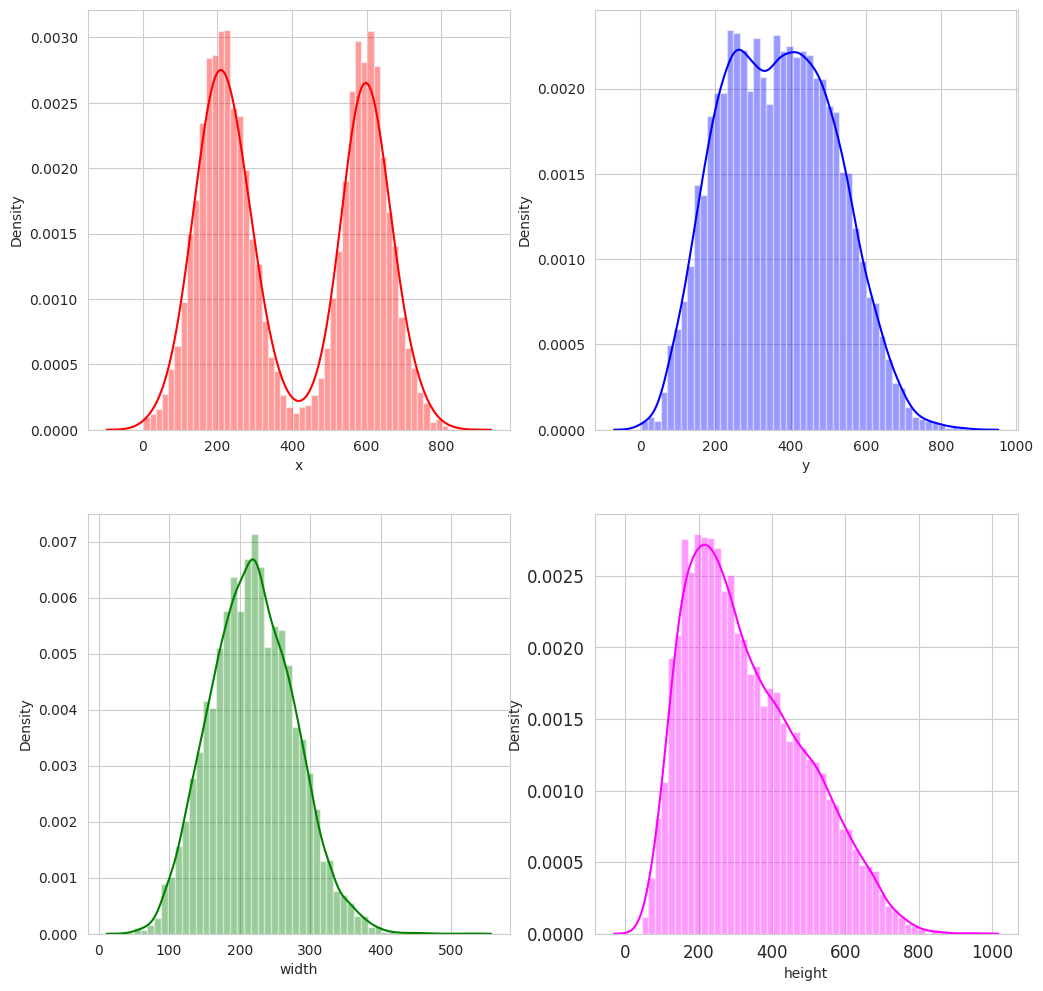

In [26]:
target1 = training_data[training_data['Target']==1]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,2,figsize=(12,12))
sns.distplot(target1['x'],kde=True,bins=50, color="red", ax=ax[0,0])
sns.distplot(target1['y'],kde=True,bins=50, color="blue", ax=ax[0,1])
sns.distplot(target1['width'],kde=True,bins=50, color="green", ax=ax[1,0])
sns.distplot(target1['height'],kde=True,bins=50, color="magenta", ax=ax[1,1])
locs, labels = plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

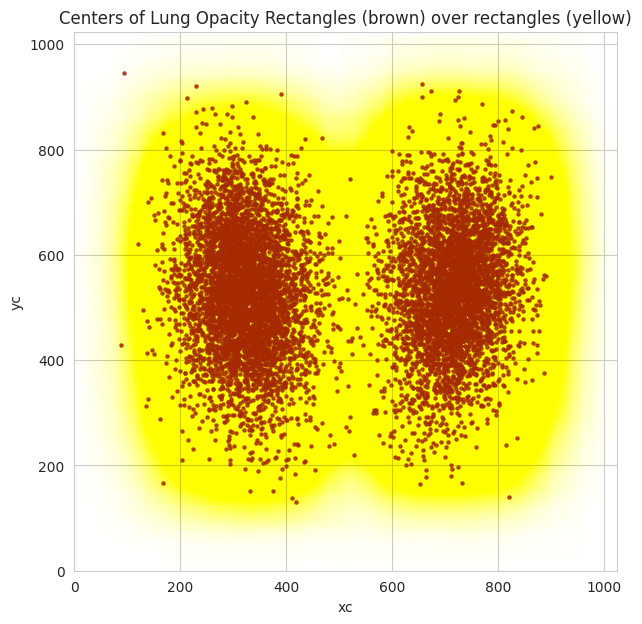

In [27]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
target_sample = training_data[training_data['Target'] == 1]
target_sample['xc'] = target_sample['x'] + target_sample['width'] / 2
target_sample['yc'] = target_sample['y'] + target_sample['height'] / 2
plt.title('Centers of Lung Opacity Rectangles (brown) over rectangles (yellow)')
target_sample.plot.scatter(x = 'xc', y = 'yc', xlim = (0, 1024), ylim = (0, 1024), ax = ax, alpha = 0.8, marker = '.', color = 'brown')

for i, crt_sample in target_sample.iterrows():
    ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
                width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color="yellow"))

**Map training and testing images to its classes**

In [13]:
!pip install pydicom
import pydicom as dicom

In [14]:
def load_dcm_from_folder(folder,data):
  image_class_mapping = {}
  from zipfile import ZipFile
  with ZipFile(data_dir+folder+'.zip','r') as z:
   z.extractall()
  for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    dicom_data = dicom.dcmread(file_path)
    patient_id = dicom_data.PatientID
    label_row = data[data['patientId'] == patient_id]
    if not label_row.empty:
      image_class = label_row.iloc[0]['class']
      image_class_mapping[filename] = image_class
  return image_class_mapping


In [17]:
df_train = load_dcm_from_folder('stage_2_train_images',training_data)

In [31]:
df_test = load_dcm_from_folder('stage_2_test_images',testing_data)

In [32]:
!unzip "/content/drive/My Drive/AIML/Capstone Project/stage_2_train_images.zip" -d "/content/"
!unzip "/content/drive/My Drive/AIML/Capstone Project/stage_2_test_images.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/stage_2_test_images/2836c671-b555-4af7-b1c2-25d73cb113f1.dcm  
  inflating: /content/__MACOSX/stage_2_test_images/._2836c671-b555-4af7-b1c2-25d73cb113f1.dcm  
  inflating: /content/stage_2_test_images/1e2c8423-ba80-47dc-b590-841c472cbc27.dcm  
  inflating: /content/__MACOSX/stage_2_test_images/._1e2c8423-ba80-47dc-b590-841c472cbc27.dcm  
  inflating: /content/stage_2_test_images/1eda3687-bdf5-469f-8fba-5000c559f48b.dcm  
  inflating: /content/__MACOSX/stage_2_test_images/._1eda3687-bdf5-469f-8fba-5000c559f48b.dcm  
  inflating: /content/stage_2_test_images/243be28d-f021-457f-b86c-95394c9be74c.dcm  
  inflating: /content/__MACOSX/stage_2_test_images/._243be28d-f021-457f-b86c-95394c9be74c.dcm  
  inflating: /content/stage_2_test_images/2cdd3a1a-75d5-45bb-b8b4-0568cadd3f2b.dcm  
  inflating: /content/__MACOSX/stage_2_test_images/._2cdd3a1a-75d5-45bb-b8b4-0568cadd3f2b.dcm  
  inflating: /content/stage_2_test_images/00

In [33]:
import pydicom

sample_patientId = training_data['patientId'][0]
dcm_file = '/content/stage_2_train_images/'+'{}.dcm'.format(sample_patientId)
dcm_data = pydicom.read_file(dcm_file)

print('Metadata of the image consists of \n', dcm_data)

Metadata of the image consists of 
 Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '190

Most of the standard headers containing patient identifable information have been anonymized (removed) so we are left with a relatively sparse set of metadata. The primary field we will be accessing is the underlying pixel data as follows:

From the above sample we can see that dicom file contains some of the information that can be used for further analysis such as sex, age, body part examined (which should be mostly chest), view position and modality. Size of this image is 1024 x 1024 (rows x columns).

In [34]:
print('Number of images in training images folders are: {}.'.format(len(os.listdir('/content/stage_2_train_images'))))

Number of images in training images folders are: 26684.


Thus, we can see that in the training images folder we have just 26684 images which is same as that of unique patientId's present in either of the csv files. Thus, we can say that each of the unique patientId's present in either of the csv files corresponds to an image present in the folder.

**Map training and testing images to its annotations**

Here annotations means image annotations and we need to pay attention about modality, patient releated information which is always contant

In [15]:
def map_annotations_from_image(folder,df_image,data):
  vars = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined','ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']
  for var in vars:
    data[var] = None
  for image, image_class in df_image.items():
    file_path = os.path.join(folder,image)
    dcm_img = dicom.dcmread(file_path)
    patient_id = dcm_img.PatientID
    label_row = data[data['patientId'] == patient_id]
    if not label_row.empty:
      data.loc[label_row.index,'Modality'] = dcm_img.Modality
      data.loc[label_row.index,'PatientAge'] = pd.to_numeric(dcm_img.PatientAge)
      data.loc[label_row.index,'PatientSex'] = dcm_img.PatientSex
      data.loc[label_row.index, 'BodyPartExamined'] = dcm_img.BodyPartExamined
      data.loc[label_row.index,'ViewPosition'] = dcm_img.ViewPosition
      data.loc[label_row.index,'ConversionType'] = dcm_img.ConversionType
      data.loc[label_row.index,'Rows'] = dcm_img.Rows
      data.loc[label_row.index,'Columns'] = dcm_img.Columns
      data.loc[label_row.index,'PixelSpacing'] = ('{:4.3f}'.format(dcm_img.PixelSpacing[0]))

  return data


In [18]:
train_data = map_annotations_from_image('stage_2_train_images',df_train,training_data)

train_data

patientId      x      y  width  height  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN   
2      00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN   
4      00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0   
...                                     ...    ...    ...    ...     ...   
30222  c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8  185.0  298.0  228.0   379.0   
30223  c1edf42b-5958-47ff-a1e7-4f23d99583ba    NaN    NaN    NaN     NaN   
30224  c1f6b555-2eb1-4231-98f6-50a963976431    NaN    NaN    NaN     NaN   
30225  c1f7889a-9ea9-4acb-b64c-b737c929599a  570.0  393.0  261.0   345.0   
30226  c1f7889a-9ea9-4acb-b64c-b737c929599a  233.0  424.0  201.0   356.0   

       Target                         class Modality PatientAge PatientSex  \
0           0  No Lung Opacity / Not Normal       CR         51          F   
1           0  No Lung Opacity / Not Normal       CR         48          F   
2           0  No Lung Opacity / Not Normal       CR         19          M   
3           0                        Normal       CR         28          M   
4           1                  Lung Opacity       CR         32          F   
...       ...                           ...      ...        ...        ...   
30222       1                  Lung Opacity       CR         54          M   
30223       0                        Normal       CR         46          F   
30224       0                        Normal       CR         45          M   
30225       1                  Lung Opacity       CR         72          F   
30226       1                  Lung Opacity       CR         72          F   

      BodyPartExamined ViewPosition ConversionType  Rows Columns PixelSpacing  
0                CHEST           PA            WSD  1024    1024        0.143  
1                CHEST           PA            WSD  1024    1024        0.194  
2                CHEST           AP            WSD  1024    1024        0.168  
3                CHEST           PA            WSD  1024    1024        0.143  
4                CHEST           AP            WSD  1024    1024        0.139  
...                ...          ...            ...   ...     ...          ...  
30222            CHEST           AP            WSD  1024    1024        0.139  
30223            CHEST           PA            WSD  1024    1024        0.143  
30224            CHEST           PA            WSD  1024    1024        0.168  
30225            CHEST           AP            WSD  1024    1024        0.139  
30226            CHEST           AP            WSD  1024    1024        0.139  

[30227 rows x 16 columns]

In [37]:
test_data = map_annotations_from_image('stage_2_test_images',df_test,testing_data)
test_data

patientId PredictionString  \
0     0000a175-0e68-4ca4-b1af-167204a7e0bc  0.5 0 0 100 100   
1     0005d3cc-3c3f-40b9-93c3-46231c3eb813  0.5 0 0 100 100   
2     000686d7-f4fc-448d-97a0-44fa9c5d3aa6  0.5 0 0 100 100   
3     000e3a7d-c0ca-4349-bb26-5af2d8993c3d  0.5 0 0 100 100   
4     00100a24-854d-423d-a092-edcf6179e061  0.5 0 0 100 100   
...                                    ...              ...   
2995  c1e88810-9e4e-4f39-9306-8d314bfc1ff1  0.5 0 0 100 100   
2996  c1ec035b-377b-416c-a281-f868b7c9b6c3  0.5 0 0 100 100   
2997  c1ef5b66-0fd7-49d1-ae6b-5af84929414b  0.5 0 0 100 100   
2998  c1ef6724-f95f-40f1-b25b-de806d9bc39d  0.5 0 0 100 100   
2999  c1f55e7e-4065-4dc0-993e-a7c1704c6036  0.5 0 0 100 100   

                             class Modality PatientAge PatientSex  \
0     No Lung Opacity / Not Normal       CR         46          F   
1     No Lung Opacity / Not Normal       CR         22          F   
2     No Lung Opacity / Not Normal       CR         64          M   
3                           Normal       CR         75          F   
4                     Lung Opacity       CR         66          F   
...                            ...      ...        ...        ...   
2995                  Lung Opacity       CR         10          F   
2996  No Lung Opacity / Not Normal       CR         74          M   
2997  No Lung Opacity / Not Normal       CR         58          M   
2998                  Lung Opacity       CR         36          M   
2999                  Lung Opacity       CR         57          M   

     BodyPartExamined ViewPosition ConversionType  Rows Columns PixelSpacing  
0               CHEST           PA            WSD  1024    1024        0.194  
1               CHEST           PA            WSD  1024    1024        0.143  
2               CHEST           PA            WSD  1024    1024        0.143  
3               CHEST           PA            WSD  1024    1024        0.143  
4               CHEST           AP            WSD  1024    1024        0.139  
...               ...          ...            ...   ...     ...          ...  
2995            CHEST           AP            WSD  1024    1024        0.139  
2996            CHEST           PA            WSD  1024    1024        0.143  
2997            CHEST           PA            WSD  1024    1024        0.168  
2998            CHEST           PA            WSD  1024    1024        0.143  
2999            CHEST           PA            WSD  1024    1024        0.143  

[3000 rows x 12 columns]

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patientId         30227 non-null  object 
 1   x                 9555 non-null   float64
 2   y                 9555 non-null   float64
 3   width             9555 non-null   float64
 4   height            9555 non-null   float64
 5   Target            30227 non-null  int64  
 6   class             30227 non-null  object 
 7   Modality          30227 non-null  object 
 8   PatientAge        30227 non-null  object 
 9   PatientSex        30227 non-null  object 
 10  BodyPartExamined  30227 non-null  object 
 11  ViewPosition      30227 non-null  object 
 12  ConversionType    30227 non-null  object 
 13  Rows              30227 non-null  object 
 14  Columns           30227 non-null  object 
 15  PixelSpacing      30227 non-null  object 
dtypes: float64(4), int64(1), object(11)
memo

In [39]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   patientId         3000 non-null   object
 1   PredictionString  3000 non-null   object
 2   class             3000 non-null   object
 3   Modality          3000 non-null   object
 4   PatientAge        3000 non-null   object
 5   PatientSex        3000 non-null   object
 6   BodyPartExamined  3000 non-null   object
 7   ViewPosition      3000 non-null   object
 8   ConversionType    3000 non-null   object
 9   Rows              3000 non-null   object
 10  Columns           3000 non-null   object
 11  PixelSpacing      3000 non-null   object
dtypes: object(12)
memory usage: 369.2+ KB


In [41]:
# Merging the images dataframe with train_data dataframe
print('After merging the two dataframe, the training data has {} rows and {} columns.'.format(train_data.shape[0], train_data.shape[1]))

After merging the two dataframe, the training data has 30227 rows and 16 columns.


**Preprocessing and Visualisation of different classes**

In [40]:
print('The images obtained are of {} areas.'.format(train_data['BodyPartExamined'].unique()[0]))

The images obtained are of CHEST areas.


In [42]:
get_feature_distribution(train_data.drop_duplicates('patientId'), 'ViewPosition')

Feature: ViewPosition
PA                            : 14511 which is 54.38% of the total data in the dataset
AP                            : 12173 which is 45.61% of the total data in the dataset


As seen above, two View Positions that are in the training dataset are AP (Anterior/Posterior) and PA (Posterior/Anterior). These type of X-rays are mostly used to obtain the front-view. Apart from front-view, a lateral image is usually taken to complement the front-view.

**Posterior/Anterior (PA):** Here the chest radiograph is acquired by passing the X-Ray beam from the patient's posterior (back) part of the chest to the anterior (front) part. While obtaining the image patient is asked to stand with their chest against the film. In this image, the hear is on the right side of the image as one looks at it. These are of higher quality and assess the heart size more accurately.

**Anterior/Posterior (AP):** At times it is not possible for radiographers to acquire a PA chest X-ray. This is usually because the patient is too unwell to stand. In these images the size of Heart is exaggerated.


In [43]:
def bboxes_scatter(data, color_point, color_window, text):
  fig, ax = plt.subplots(1, 1, figsize = (7, 7))
  plt.title('Plotting centers of Lung Opacity\n{}'.format(text))
  data.plot.scatter(x = 'xw', y = 'yh', xlim = (0, 1024), ylim = (0, 1024), ax = ax, alpha = 0.8, marker = ".", color = color_point)
  for i, crt_sample in data.iterrows():
    ax.add_patch(Rectangle(xy = (crt_sample['x'], crt_sample['y']), width = crt_sample['width'], height = crt_sample['height'], alpha = 3.5e-3, color = color_window))

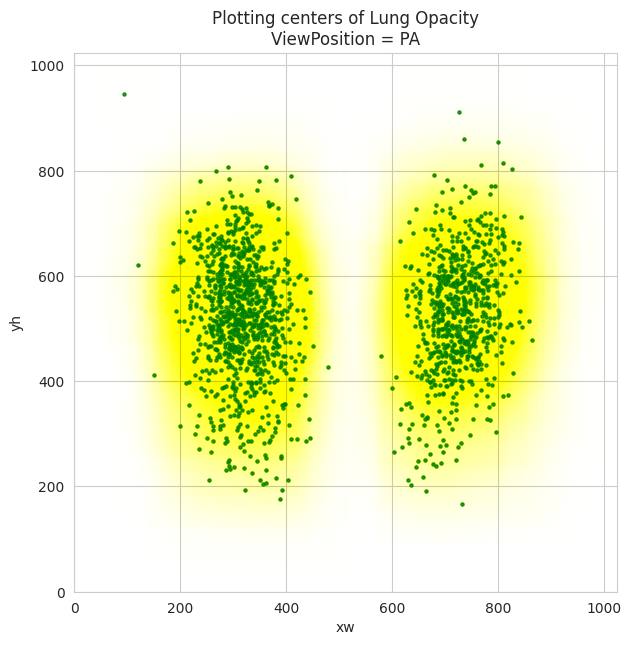

In [44]:
bboxes = train_data[training_data['Target'] == 1]
bboxes['xw'] = bboxes['x'] + bboxes['width']/2
bboxes['yh'] = bboxes['y'] + bboxes['height']/2

data_PA = bboxes[bboxes['ViewPosition'] == 'PA']
data_AP = bboxes[bboxes['ViewPosition'] == 'AP']

bboxes_scatter(data_PA, 'green', 'yellow', 'ViewPosition = PA')

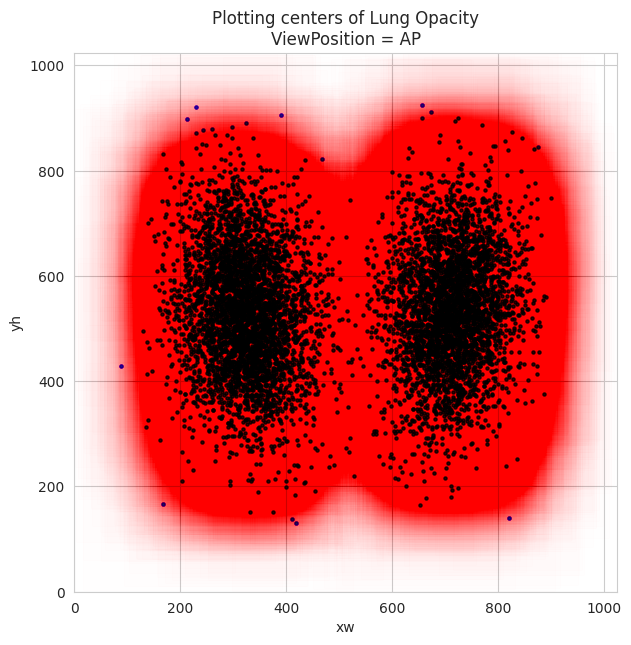

In [45]:
bboxes_scatter(data_AP, 'blue', 'red', 'ViewPosition = AP')

In [46]:
#Rows and Columns
print(f'The training images has {training_data.Rows.unique()[0]} rows and {train_data.Columns.unique()[0]} columns.')

The training images has 1024 rows and 1024 columns.


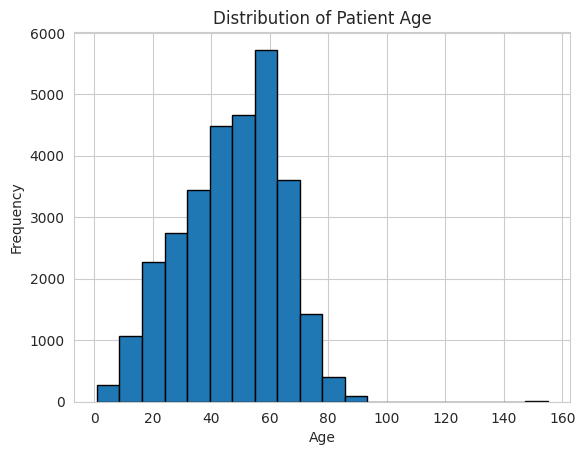

In [47]:
train_data['PatientAge'] = train_data['PatientAge'].astype(float)
plt.hist(train_data['PatientAge'], bins=20, edgecolor='black')
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


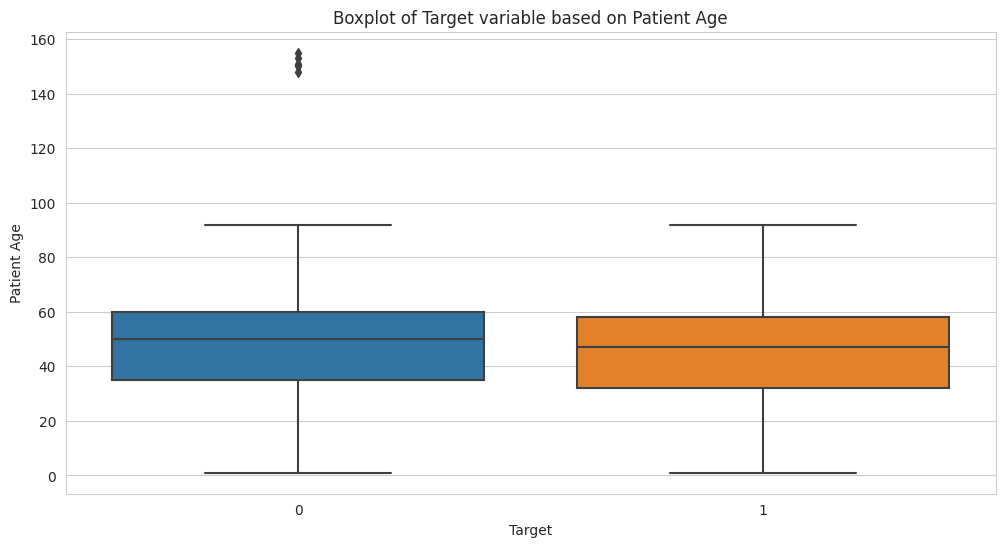

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='PatientAge', data=train_data)
plt.title('Boxplot of Target variable based on Patient Age')
plt.xlabel('Target')
plt.ylabel('Patient Age')
plt.show()

In [49]:
# Identify rows with 'PatientAge' greater than 110
rows_to_drop = train_data[train_data['PatientAge'] > 110]

# Print the rows to examine
print("Rows with 'PatientAge' greater than 110:")
print(rows_to_drop)

# Drop the identified rows
train_data = train_data.drop(rows_to_drop.index)

# Verify that the rows are dropped
print("DataFrame after dropping rows with 'PatientAge' greater than 110:")
print(train_data)

Rows with 'PatientAge' greater than 110:
                                  patientId   x   y  width  height  Target  \
3921   3b8b8777-a1f6-4384-872a-28b95f59bf0d NaN NaN    NaN     NaN       0   
11032  73aeea88-fc48-4030-8564-0a9d7fdecac4 NaN NaN    NaN     NaN       0   
17213  a4e8e96d-93a6-4251-b617-91382e610fab NaN NaN    NaN     NaN       0   
26488  ec3697bd-184e-44ba-9688-ff8d5fbf9bbc NaN NaN    NaN     NaN       0   
27746  f632328d-5819-4b29-b54f-adf4934bbee6 NaN NaN    NaN     NaN       0   

                              class Modality  PatientAge PatientSex  \
3921                         Normal       CR       148.0          M   
11032  No Lung Opacity / Not Normal       CR       151.0          F   
17213  No Lung Opacity / Not Normal       CR       153.0          M   
26488                        Normal       CR       150.0          M   
27746                        Normal       CR       155.0          F   

      BodyPartExamined ViewPosition ConversionType  Rows Column

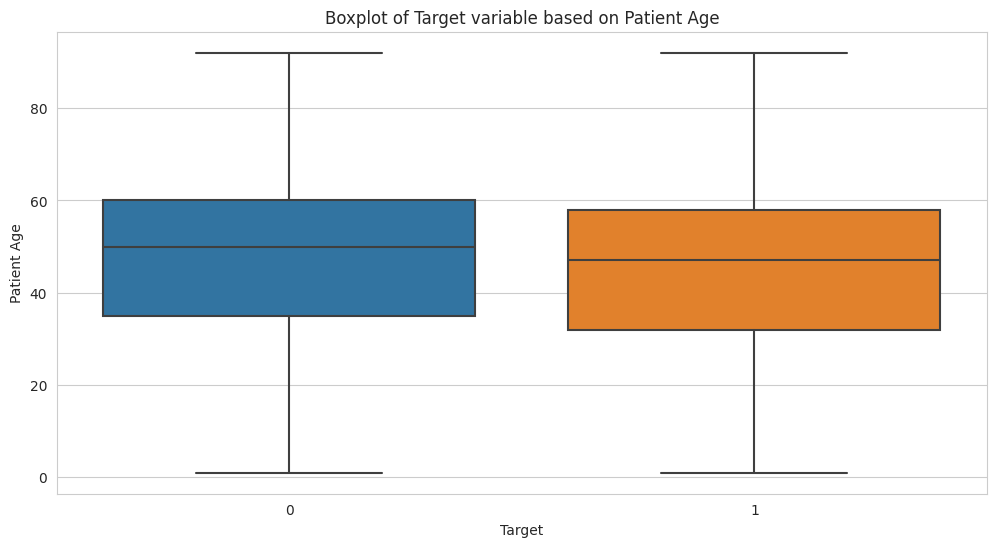

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='PatientAge', data=train_data)
plt.title('Boxplot of Target variable based on Patient Age')
plt.xlabel('Target')
plt.ylabel('Patient Age')
plt.show()


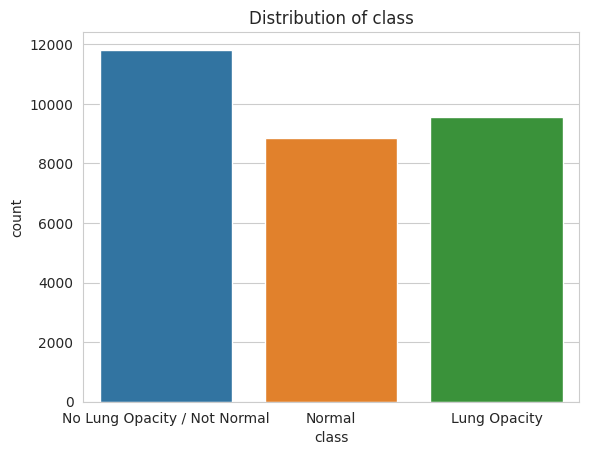

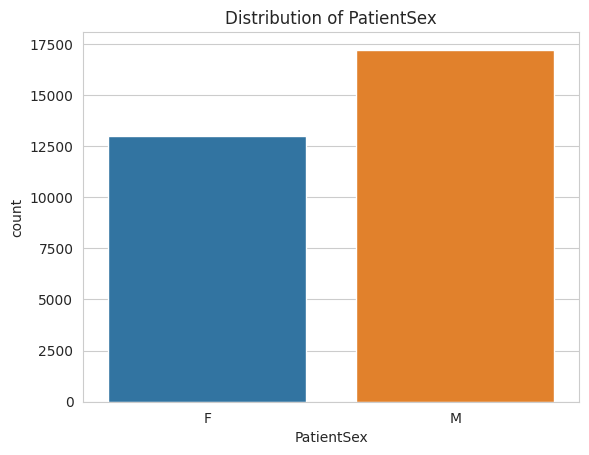

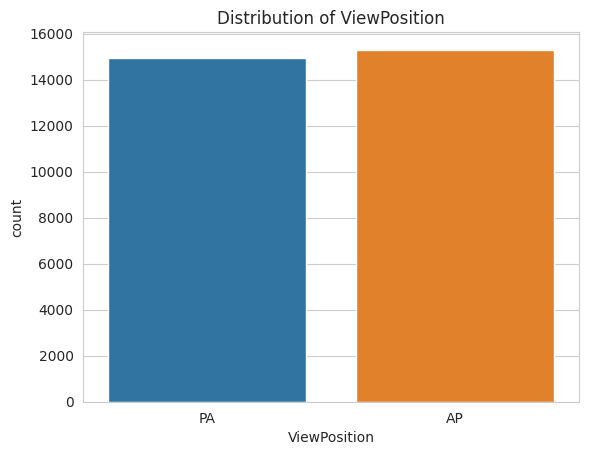

In [51]:
categorical_columns = ['class', 'PatientSex', 'ViewPosition']
for column in categorical_columns:
    sns.countplot(x=column, data=train_data)
    plt.title(f'Distribution of {column}')
    plt.show()


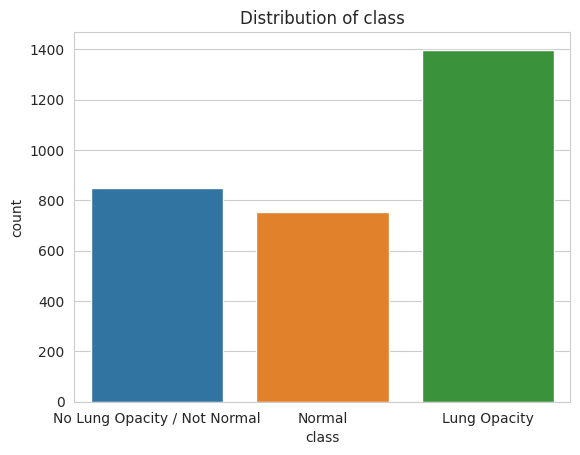

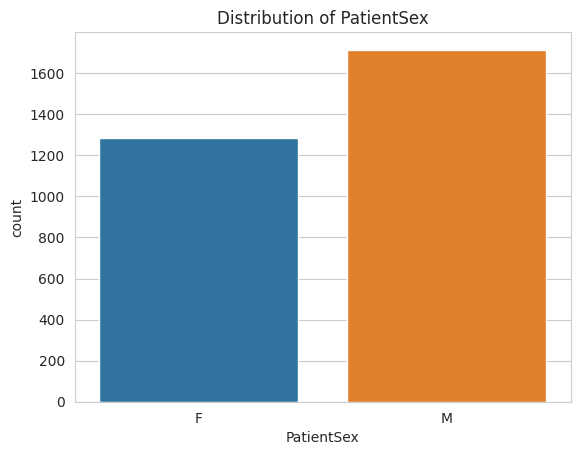

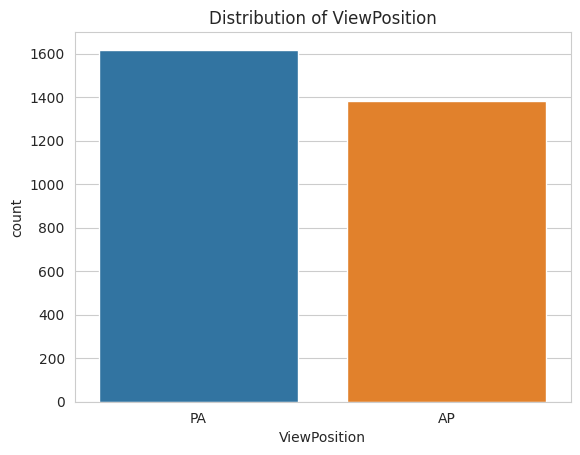

In [51]:
categorical_columns = ['class', 'PatientSex', 'ViewPosition']
for column in categorical_columns:
    sns.countplot(x=column, data=test_data)
    plt.title(f'Distribution of {column}')
    plt.show()


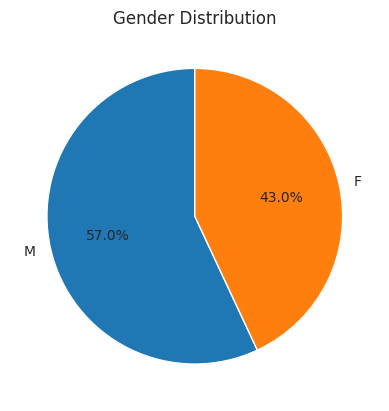

In [52]:
gender_distribution = train_data['PatientSex'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

In [53]:
get_feature_distribution(train_data.drop_duplicates('patientId'), 'PatientSex')

Feature: PatientSex
M                             : 15163 which is 56.83% of the total data in the dataset
F                             : 11516 which is 43.16% of the total data in the dataset


In [54]:
#Patient Sex
def drawgraphs(data_file, columns, hue = False, width = 15, showdistribution = True):
  if (hue):
    print('Creating graph for: {} and {}'.format(columns, hue))
  else:
    print('Creating graph for : {}'.format(columns))
  length = len(columns) * 6
  total = float(len(data_file))

  fig, axes = plt.subplots(nrows = len(columns) if len(columns) > 1 else 1, ncols = 1, figsize = (width, length))
  for index, content in enumerate(columns):
    plt.title(content)

    currentaxes = 0
    if (len(columns) > 1):
      currentaxes = axes[index]
    else:
      currentaxes = axes

    if (hue):
      sns.countplot(x = columns[index], data = data_file, ax = currentaxes, hue = hue)
    else:
      sns.countplot(x = columns[index], data = data_file, ax = currentaxes)

    if(showdistribution):
      for p in (currentaxes.patches):
        height = p.get_height()
        if (height > 0 and total > 0):
          currentaxes.text(p.get_x() + p.get_width()/2., height + 3, '{:1.2f}%'.format(100*height/total), ha = "center")

Creating graph for: ['PatientSex'] and class


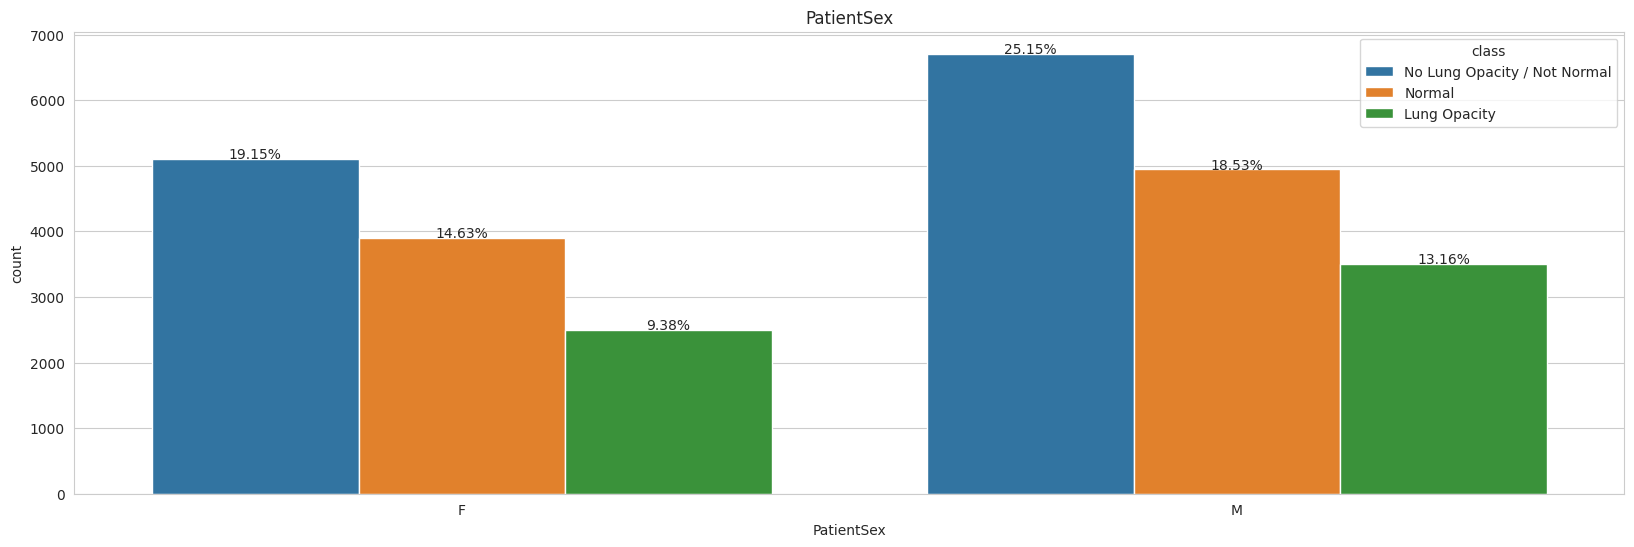

In [55]:
drawgraphs(data_file = train_data.drop_duplicates('patientId'), columns = ['PatientSex'], hue = 'class', width = 20, showdistribution = True)

Creating graph for: ['PatientSex'] and Target


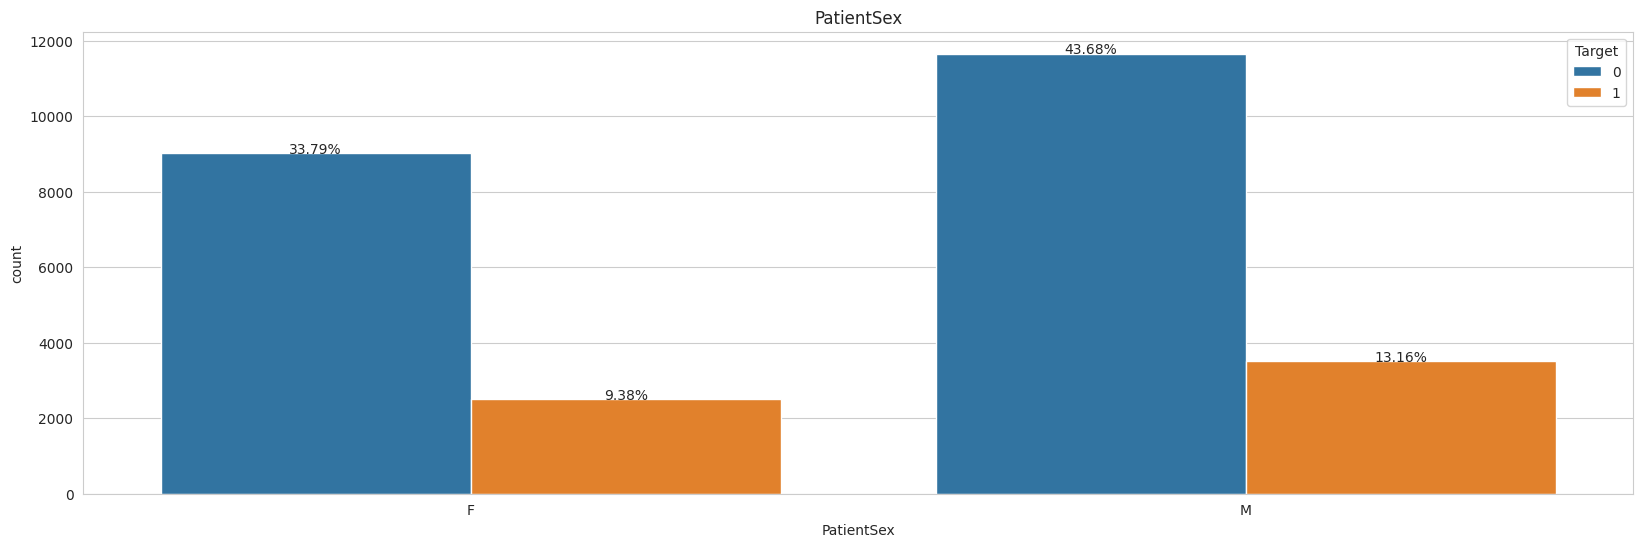

In [56]:
drawgraphs(data_file = train_data.drop_duplicates('patientId'), columns = ['PatientSex'], hue = 'Target', width = 20, showdistribution = True)

we can see that the number of **Male** patients suffering from Pneumonia is greater when compared with that of Females.

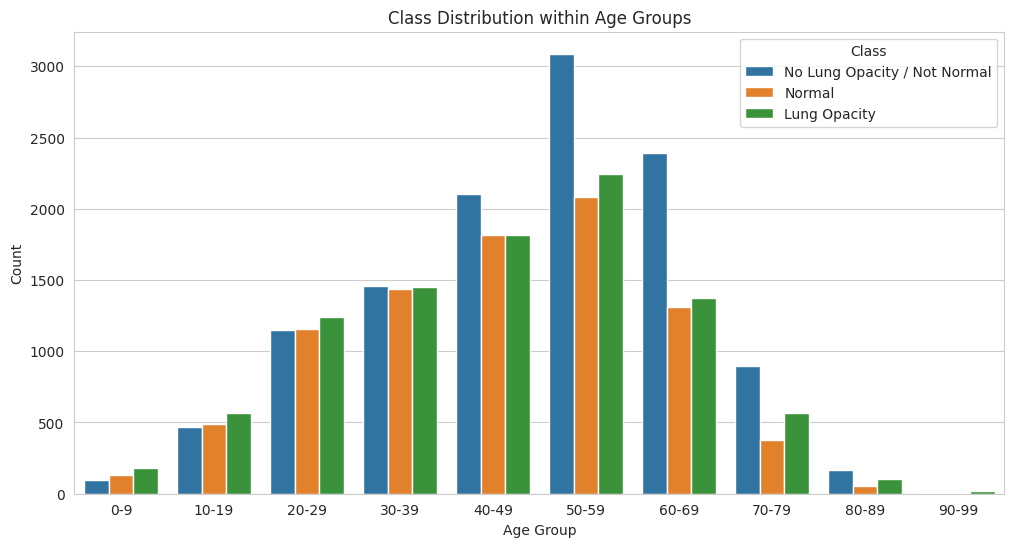

In [57]:
df = train_data
# Convert 'PatientAge' to numeric and create age groups
df['PatientAge'] = pd.to_numeric(df['PatientAge'], errors='coerce')
df['AgeGroup'] = pd.cut(df['PatientAge'], bins=range(0, 110, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

# Count plot for class distribution within age groups
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', hue='class', data=df)
plt.title('Class Distribution within Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()


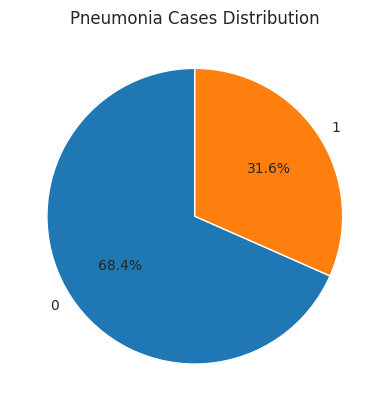

In [58]:
Pneumonia_Cases_distribution = train_data['Target'].value_counts()
plt.pie(Pneumonia_Cases_distribution, labels=Pneumonia_Cases_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Pneumonia Cases Distribution')
plt.show()

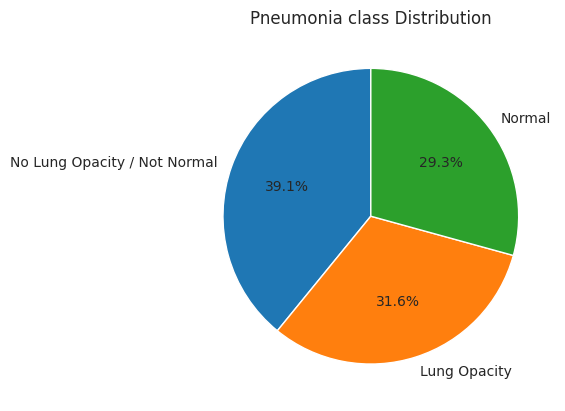

In [59]:
Pneumonia_Cases_distribution = train_data['class'].value_counts()
plt.pie(Pneumonia_Cases_distribution, labels=Pneumonia_Cases_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Pneumonia class Distribution')
plt.show()

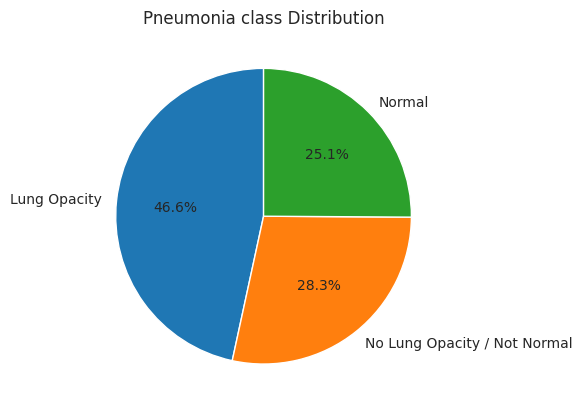

In [60]:
Pneumonia_Cases_distribution = test_data['class'].value_counts()
plt.pie(Pneumonia_Cases_distribution, labels=Pneumonia_Cases_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Pneumonia class Distribution')
plt.show()

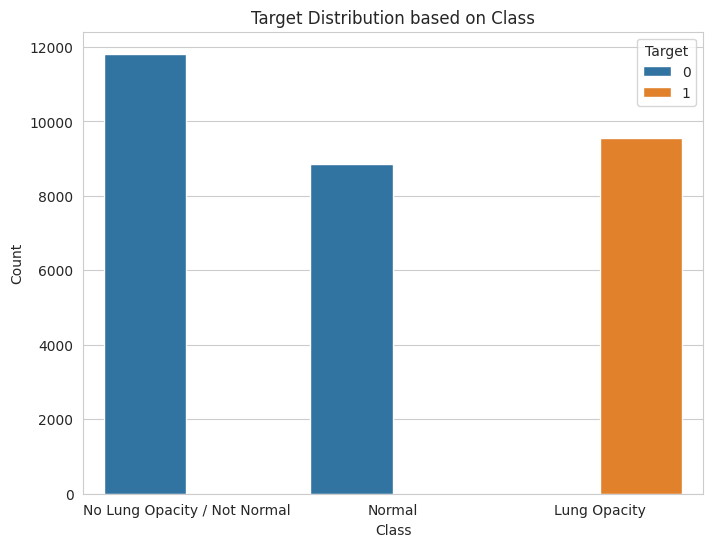

In [61]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='Target', data=train_data)

# Set labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Target Distribution based on Class')

# Show the plot
plt.show()

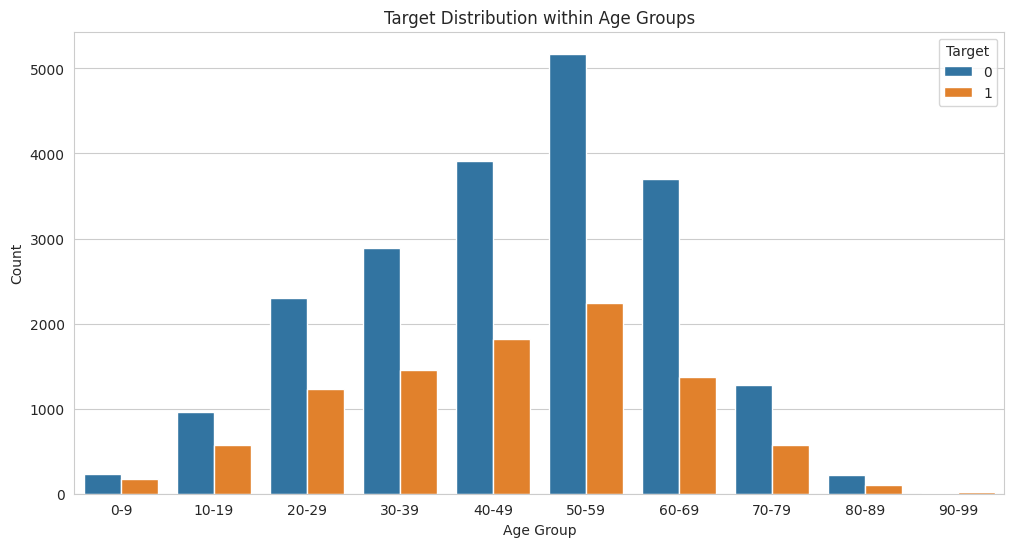

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', hue='Target', data=df)
plt.title('Target Distribution within Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()


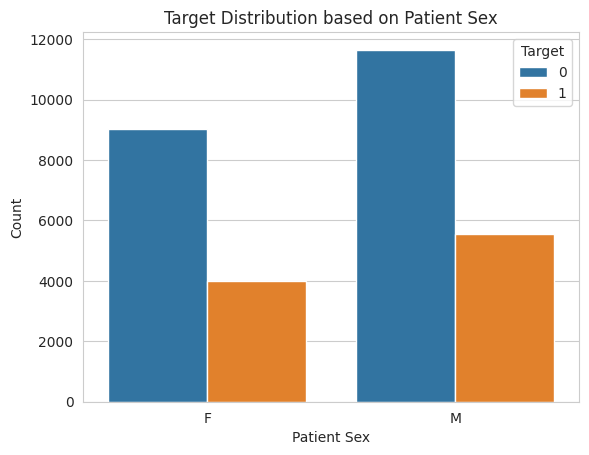

In [63]:
sns.countplot(x='PatientSex', hue='Target', data=df)
plt.title('Target Distribution based on Patient Sex')
plt.xlabel('Patient Sex')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()


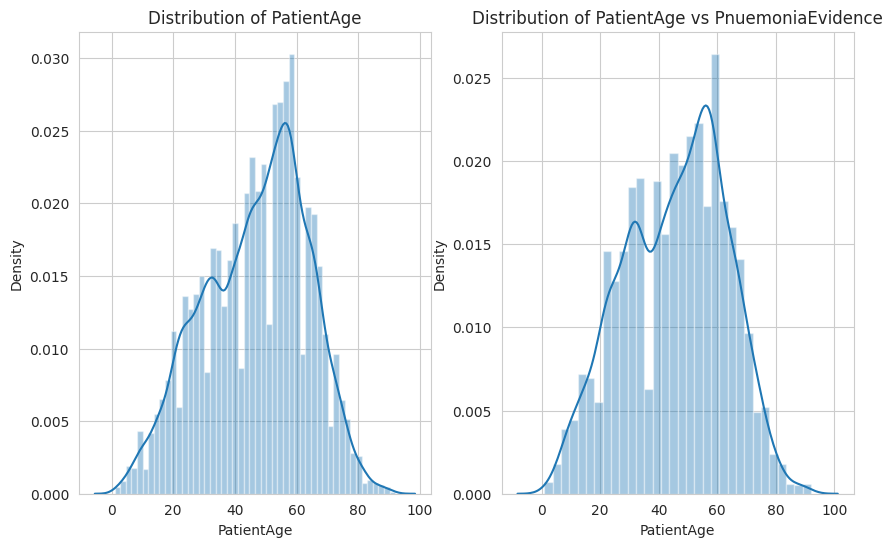

In [64]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(121)
g = (sns.distplot(train_data['PatientAge']).set_title('Distribution of PatientAge'))

ax = fig.add_subplot(122)
g = (sns.distplot(train_data.drop_duplicates('patientId').loc[train_data['Target'] == 1, 'PatientAge']).set_title('Distribution of PatientAge vs PnuemoniaEvidence'))

**Display images with bounding box**

In [66]:
#Plotting DICOM Images
def show_dicom_images(data, df, img_path):
  img_data = list(data.T.to_dict().values())
  f, ax = plt.subplots(3, 3, figsize = (16, 18))

  for i, row in enumerate(img_data):
    image = row['patientId'] + '.dcm'
    path = os.path.join(img_path, image)
    data = pydicom.read_file(path)
    rows = df[df['patientId'] == row['patientId']]
    age = rows.PatientAge.unique().tolist()[0]
    sex = data.PatientSex
    part = data.BodyPartExamined
    vp = data.ViewPosition
    modality = data.Modality
    data_img = pydicom.dcmread(path)
    ax[i//3, i%3].imshow(data_img.pixel_array, cmap = plt.cm.bone)
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title('ID: {}\nAge: {}, Sex: {}, Part: {}, VP: {}, Modality: {}\nTarget: {}, Class: {}\nWindow: {}:{}:{}:{}'\
                            .format(row['patientId'], age, sex, part,
                                    vp, modality, row['Target'],
                                    row['class'], row['x'],
                                    row['y'], row['width'],
                                    row['height']))
    box_data = list(rows.T.to_dict().values())

    for j, row in enumerate(box_data):
      ax[i//3, i%3].add_patch(Rectangle(xy = (row['x'], row['y']),
                                        width = row['width'], height = row['height'],
                                        color = 'blue', alpha = 0.15))
  plt.show()

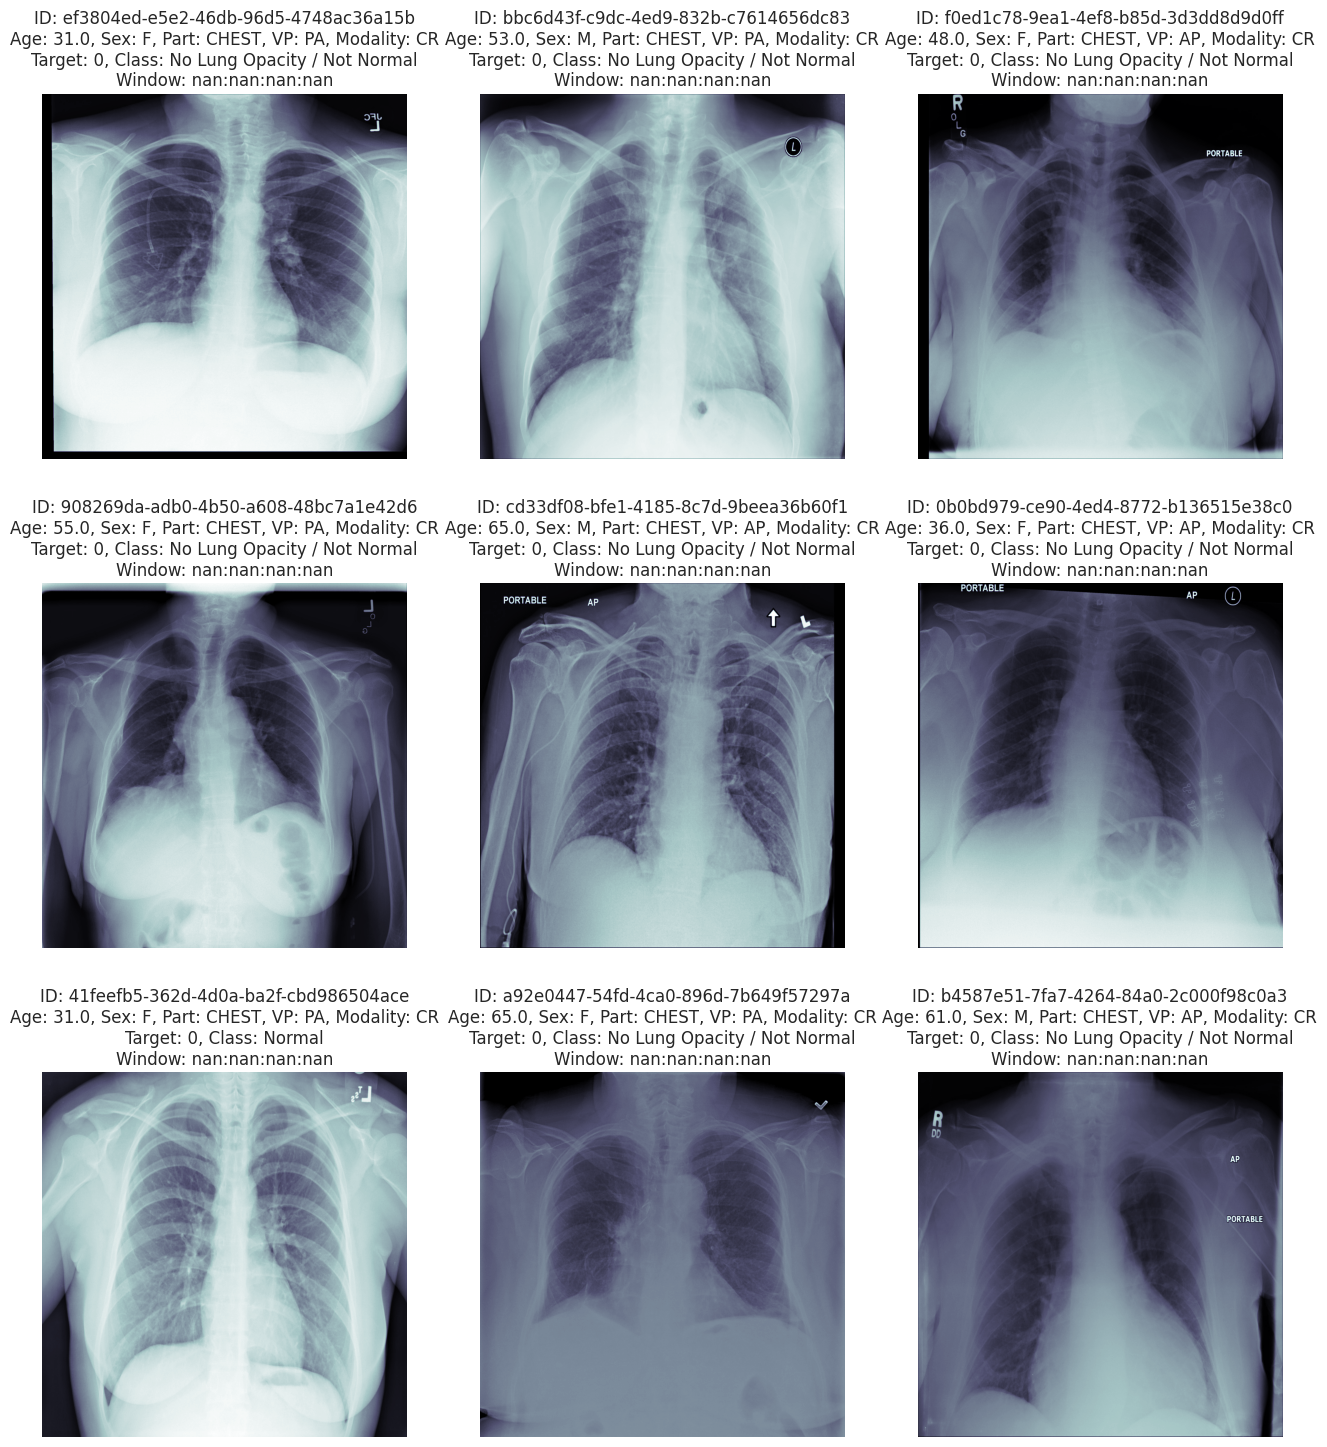

In [69]:
show_dicom_images(data = train_data.loc[(train_data['Target'] == 0)].sample(9),df = train_data, img_path = '/content/stage_2_train_images/')

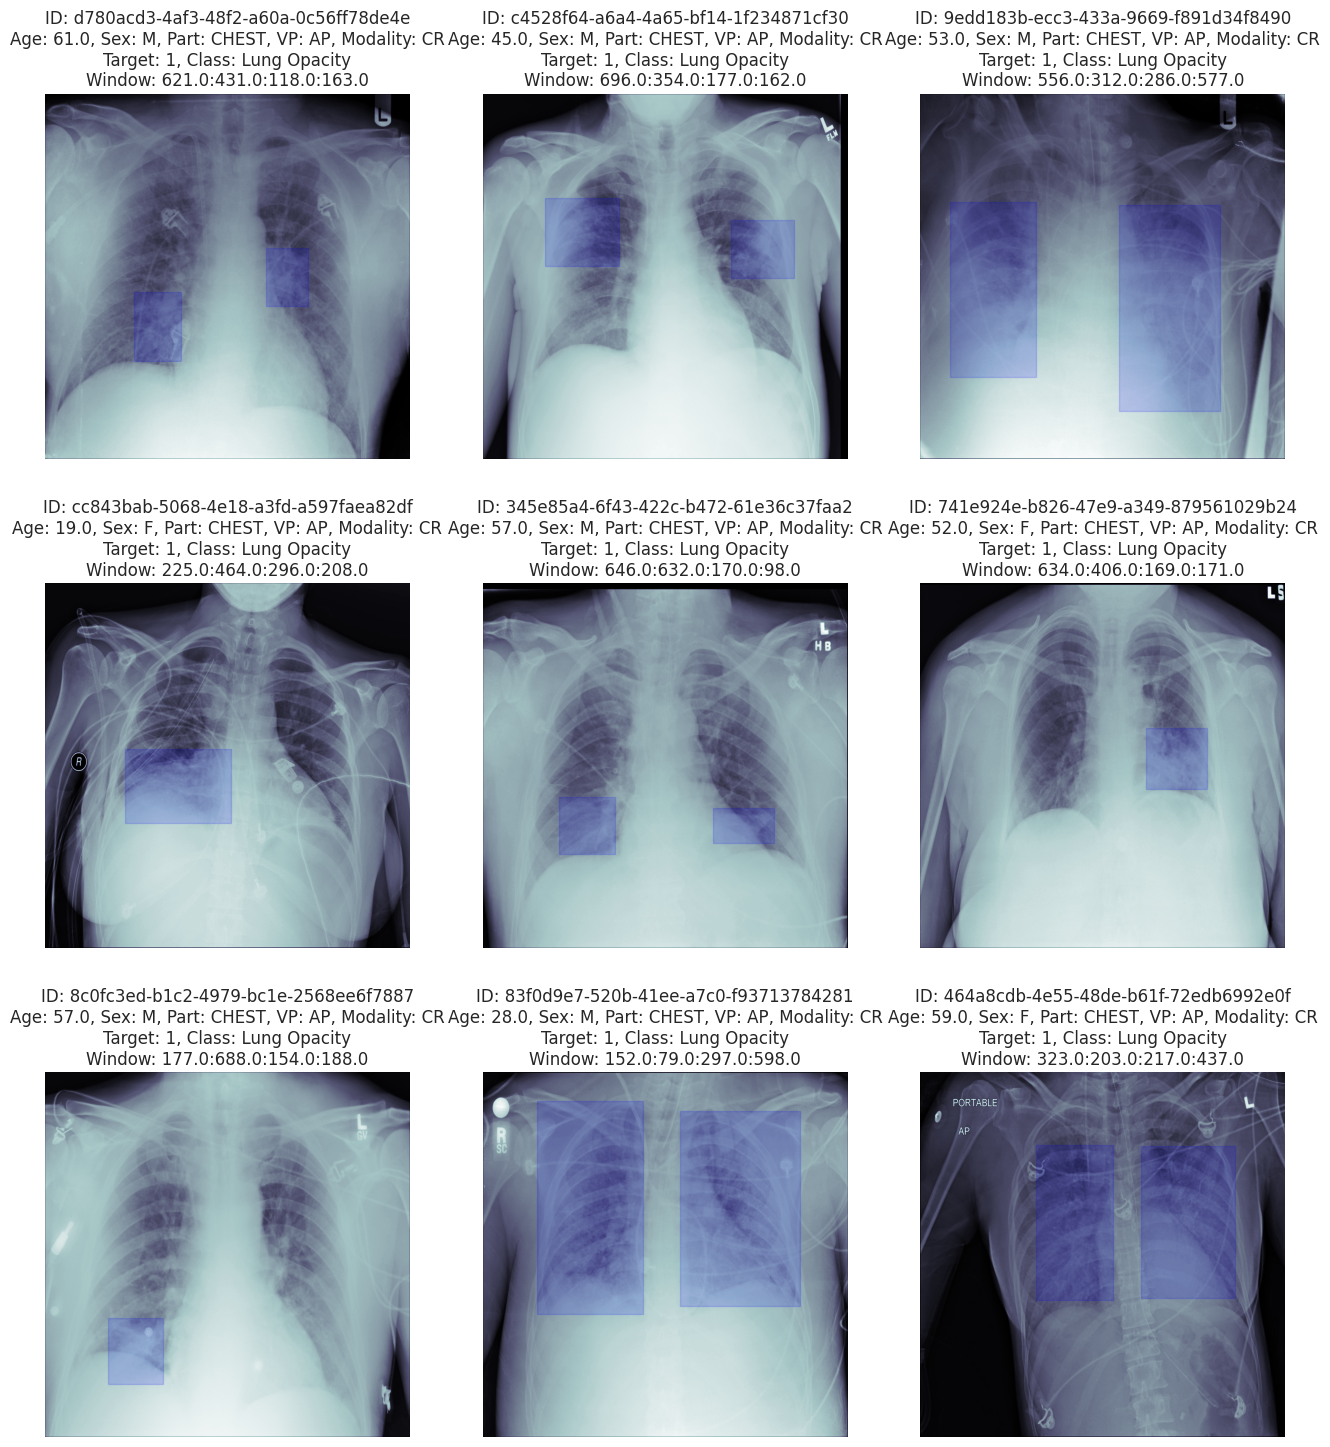

In [70]:
show_dicom_images(data = training_data.loc[(training_data['Target'] == 1)].sample(9), df = training_data, img_path = '/content/stage_2_train_images/')

In the above subplots, we can see that the area covered by the box (in blue colour) depicts the area of interest i.e., the area in which the opacity is observed in the Lungs.

**Observations**:
1. class imbalance issue is present in the dataset.
2. The training dataset(both of the csv files and training image folder) contains information of 26684 patient (unique)
3. Most of the recorded patient belong to Target = 0 (i.e., they don't have pneumonia)
4. some of the patients have more than one bounding box. The maximum being 4.
5. The classes "No Lung Opacity/Not Normal" and "Normal" is associated with the target = 0 whereas "Lung Opacity" belong to Target = 1.
6. The images are present in dicom format, from which information like patientAge, PatientSex, ViewPosition etc are obtained
7. There are two ways from which images were ontained AP and PA. The age ranges from 1- 155( Which were further clipped to 110).
8. The centers of the bounding boxes are spread out over the entire region of the lungs. But there are some centers which are outliers.

**Design, train and test basic CNN models for classification**

In [19]:
import pydicom

# Load and preprocess the images (modified for grayscale images)
def load_and_preprocess_images_RGB(data, image_dir):
    images = []
    targets = []

    for index, row in data.iterrows():
        image_id = row['patientId']
        target = row['Target']

        img_path = os.path.join(image_dir, f'{image_id}.dcm')

        try:
            img_data = pydicom.dcmread(img_path).pixel_array
                    ## Converting the image to 3 channels as the dicom image pixel does not have colour classes wiht it
            if len(img_data.shape) != 3 or img_data.shape[2] != 3:
              img_data = np.stack((img_data,) * 3, -1)

            img = np.array(img_data).astype(np.uint8)
            ## Resize the image
            res = cv2.resize(img,(128,128), interpolation = cv2.INTER_LINEAR)
            images.append(res)
            targets.append(target)
        except Exception as e:
            print(f"Error reading image {img_path}: {e}")

    images = np.array(images) / 255.0  # Normalize pixel values to be between 0 and 1
    targets = np.array(targets)

    return images, targets


In [20]:
# Load and preprocess images
image_dir = 'stage_2_train_images'
images, labels = load_and_preprocess_images_RGB(train_data, image_dir)

In [54]:
def map_target(row):
    if row['class'] == 'Lung Opacity':
        return 1
    else:
        return 0
test_data['Target'] = test_data.apply(map_target, axis=1)

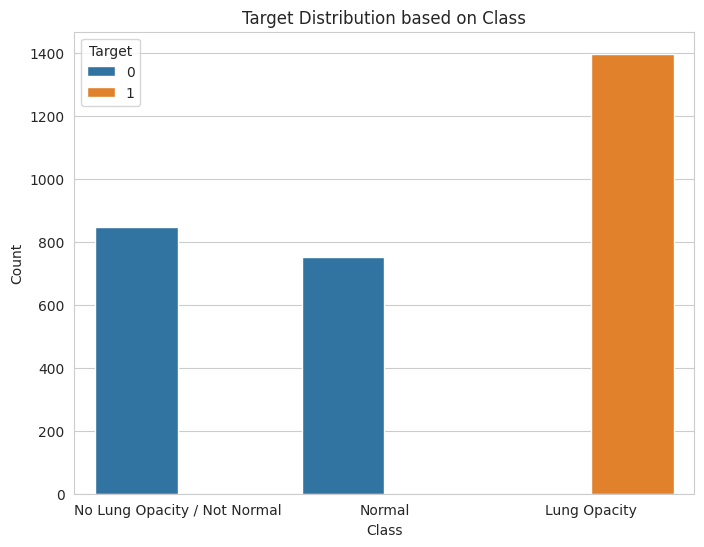

In [55]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='Target', data=test_data)

# Set labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Target Distribution based on Class')

# Show the plot
plt.show()

In [56]:
# Load and preprocess images
image_dir = 'stage_2_test_images'
testimages, testlabels = load_and_preprocess_images_RGB(test_data, image_dir)

In [21]:
# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
encoded_labels = to_categorical(encoded_labels)

In [22]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)

In [59]:
# Encode test labels
test_encoded_labels = label_encoder.fit_transform(testlabels)
test_encoded_labels = to_categorical(test_encoded_labels)

# Split data into train and test sets
X_temp, X_test, y_temp, y_test = train_test_split(testimages, test_encoded_labels, test_size=0.99, random_state=42)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Build the CNN model
basemodel = Sequential()
basemodel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
basemodel.add(MaxPooling2D((2, 2)))
basemodel.add(Conv2D(64, (3, 3), activation='relu'))
basemodel.add(MaxPooling2D((2, 2)))
basemodel.add(Flatten())
basemodel.add(Dense(128, activation='relu'))
basemodel.add(Dense(2, activation='softmax'))  # Assuming 2 classes (0 and 1)


In [24]:
# Compile the model
basemodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
# Train the model
basehistory = basemodel.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
756/756 [==============================] - 23s 23ms/step - loss: 0.5028 - accuracy: 0.7591 - val_loss: 0.4700 - val_accuracy: 0.7747
Epoch 2/20
756/756 [==============================] - 13s 17ms/step - loss: 0.4686 - accuracy: 0.7810 - val_loss: 0.4791 - val_accuracy: 0.7735
Epoch 3/20
756/756 [==============================] - 13s 17ms/step - loss: 0.4331 - accuracy: 0.8020 - val_loss: 0.4574 - val_accuracy: 0.7881
Epoch 4/20
756/756 [==============================] - 13s 17ms/step - loss: 0.3779 - accuracy: 0.8335 - val_loss: 0.4679 - val_accuracy: 0.7924
Epoch 5/20
756/756 [==============================] - 13s 17ms/step - loss: 0.3053 - accuracy: 0.8712 - val_loss: 0.4721 - val_accuracy: 0.8096
Epoch 6/20
756/756 [==============================] - 13s 17ms/step - loss: 0.2117 - accuracy: 0.9153 - val_loss: 0.6315 - val_accuracy: 0.8023
Epoch 7/20
756/756 [==============================] - 13s 17ms/step - loss: 0.1295 - accuracy: 0.9496 - val_loss: 0.7144 - val_accuracy:

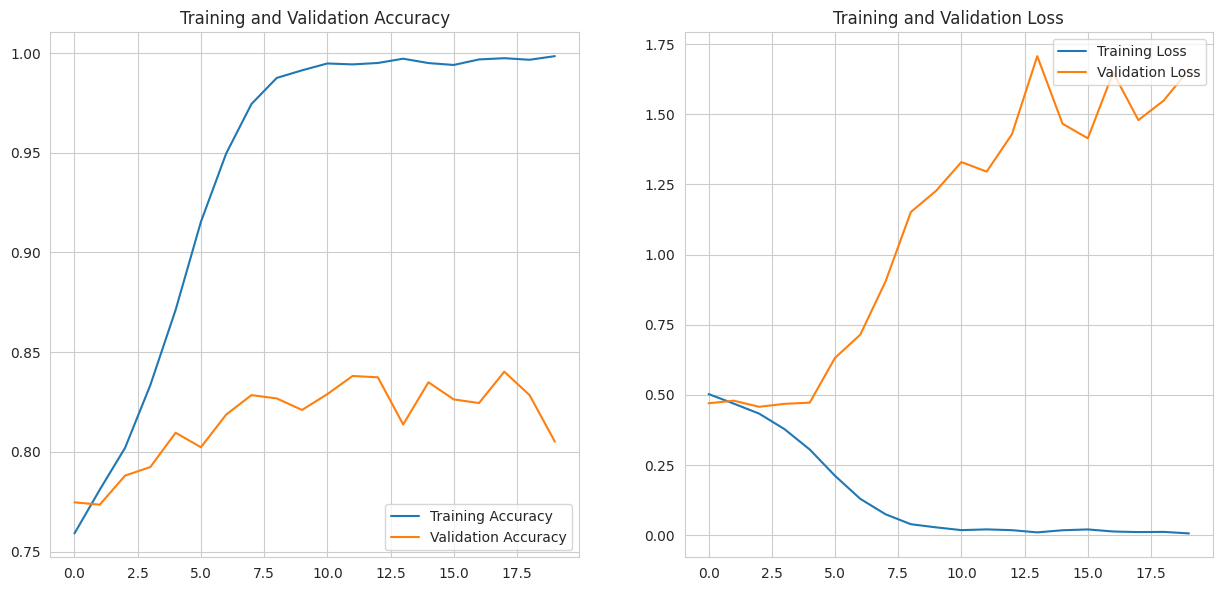

In [63]:
## PLottting the accuracy vs loss graph
acc = basehistory.history['accuracy']
val_acc = basehistory.history['val_accuracy']
loss = basehistory.history['loss']
val_loss = basehistory.history['val_loss']
epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [64]:
# Evaluate the model on the test set
train_accuracy = basehistory.history['accuracy'][-1]
val_accuracy = basehistory.history['val_accuracy'][-1]
print("train accuracy", train_accuracy)
print("val accuracy", val_accuracy)

test_acc = basemodel.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

train accuracy 0.9984282851219177
val accuracy 0.8051282167434692
93/93 [==============================] - 1s 9ms/step - loss: 5.7814 - accuracy: 0.5202
Test accuracy: [5.781373500823975, 0.5202020406723022]


In [65]:
## build different model history
model_results = []
# Store the results in a dictionary
model_result = {'Model': "CNN Base", "train accuracy":train_accuracy, "val accuracy": val_accuracy, 'Accuracy': test_acc}
# Append the dictionary to the list
model_results.append(model_result)

In [25]:
# Train the model
basehistory = basemodel.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/20
378/378 [==============================] - 21s 41ms/step - loss: 0.5193 - accuracy: 0.7497 - val_loss: 0.4852 - val_accuracy: 0.7689
Epoch 2/20
378/378 [==============================] - 11s 29ms/step - loss: 0.4660 - accuracy: 0.7774 - val_loss: 0.4767 - val_accuracy: 0.7679
Epoch 3/20
378/378 [==============================] - 11s 30ms/step - loss: 0.4485 - accuracy: 0.7919 - val_loss: 0.4679 - val_accuracy: 0.7787
Epoch 4/20
378/378 [==============================] - 11s 30ms/step - loss: 0.4170 - accuracy: 0.8104 - val_loss: 0.4618 - val_accuracy: 0.7881
Epoch 5/20
378/378 [==============================] - 11s 30ms/step - loss: 0.3663 - accuracy: 0.8375 - val_loss: 0.4733 - val_accuracy: 0.7962
Epoch 6/20
378/378 [==============================] - 11s 30ms/step - loss: 0.3039 - accuracy: 0.8689 - val_loss: 0.4774 - val_accuracy: 0.8047
Epoch 7/20
378/378 [==============================] - 11s 30ms/step - loss: 0.2308 - accuracy: 0.9057 - val_loss: 0.5487 - val_accuracy:

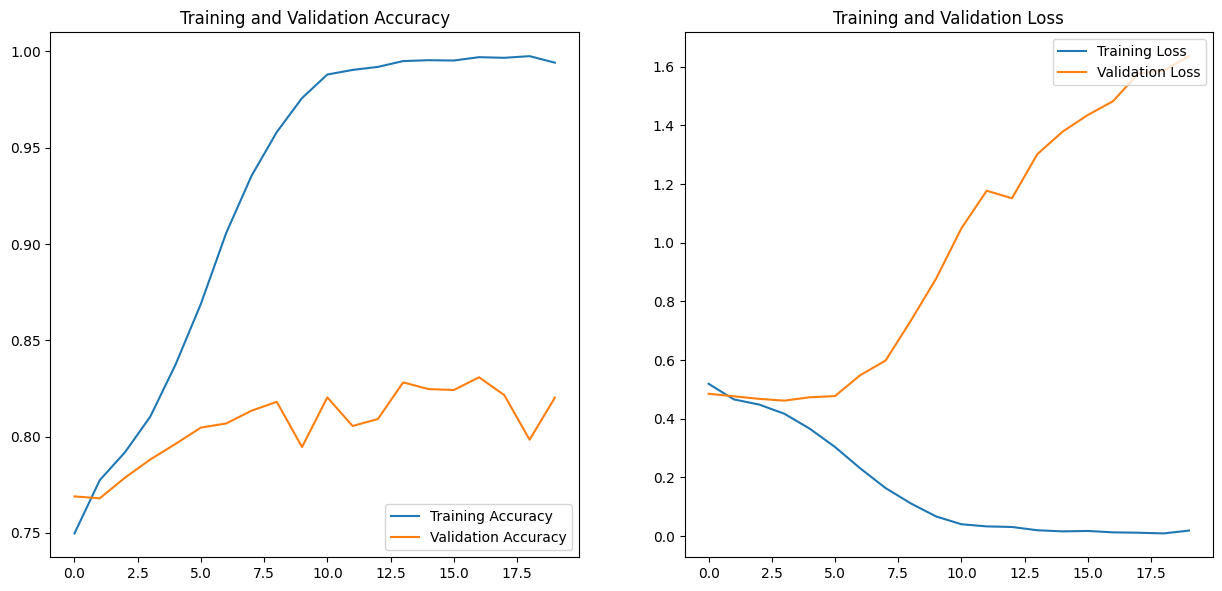

In [26]:
## PLottting the accuracy vs loss graph
acc = basehistory.history['accuracy']
val_acc = basehistory.history['val_accuracy']
loss = basehistory.history['loss']
val_loss = basehistory.history['val_loss']
epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Evaluate the model on the test set
train_accuracy = basehistory.history['accuracy'][-1]
val_accuracy = basehistory.history['val_accuracy'][-1]
print("train accuracy", train_accuracy)
print("val accuracy", val_accuracy)

test_acc = basemodel.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

train accuracy 1.0
val accuracy 0.8355665802955627
93/93 [==============================] - 0s 4ms/step - loss: 14.4956 - accuracy: 0.5242
Test accuracy: [14.495582580566406, 0.5242424011230469]


In [ ]:
# Store the results in a dictionary
model_result = {'Model': "CNN Base with 64 batchsize", "train accuracy":train_accuracy, "val accuracy": val_accuracy, 'Accuracy': test_acc}
# Append the dictionary to the list
model_results.append(model_result)

##**Milestone 2**

**Process:**
1. Fine tune the trained basic CNN models for classification.
2. Apply Transfer Learning model for classification
3. Design, train and test RCNN & its hybrids based object detection models to impose the bounding box or mask over the area of interest.
4. Pickle the model for future prediction
5. Final Report

In [ ]:
#  CNN model with hyperparameter tuned
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

cnn_model = Sequential()
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(2, activation='softmax'))  # Assuming 2 classes (0 and 1)

# Compile the model
optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
cnn_history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/20
378/378 [==============================] - 10s 19ms/step - loss: 0.6002 - accuracy: 0.7486 - val_loss: 0.4693 - val_accuracy: 0.7861
Epoch 2/20
378/378 [==============================] - 5s 13ms/step - loss: 0.4641 - accuracy: 0.7841 - val_loss: 0.4433 - val_accuracy: 0.7929
Epoch 3/20
378/378 [==============================] - 5s 13ms/step - loss: 0.4392 - accuracy: 0.7975 - val_loss: 0.4445 - val_accuracy: 0.7871
Epoch 4/20
378/378 [==============================] - 5s 13ms/step - loss: 0.4119 - accuracy: 0.8130 - val_loss: 0.4296 - val_accuracy: 0.7982
Epoch 5/20
378/378 [==============================] - 5s 13ms/step - loss: 0.3765 - accuracy: 0.8303 - val_loss: 0.4331 - val_accuracy: 0.8028
Epoch 6/20
378/378 [==============================] - 5s 13ms/step - loss: 0.3428 - accuracy: 0.8487 - val_loss: 0.4419 - val_accuracy: 0.8131
Epoch 7/20
378/378 [==============================] - 5s 13ms/step - loss: 0.3032 - accuracy: 0.8674 - val_loss: 0.4452 - val_accuracy: 0.813

In [ ]:
# Evaluate the model on the test set
train_accuracy = cnn_history.history['accuracy'][-1]
val_accuracy = cnn_history.history['val_accuracy'][-1]
print("train accuracy", train_accuracy)
print("val accuracy", val_accuracy)

test_acc = basemodel.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Store the results in a dictionary
model_result = {'Model': "CNN tune", "train accuracy":train_accuracy, "val accuracy": val_accuracy, 'Accuracy': test_acc}
# Append the dictionary to the list
model_results.append(model_result)

train accuracy 0.9664556980133057
val accuracy 0.8411910533905029
93/93 [==============================] - 0s 4ms/step - loss: 14.4956 - accuracy: 0.5242
Test accuracy: [14.495582580566406, 0.5242424011230469]


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models


##VGGNet is a well-documented and globally used architecture for convolutional neural network
## Include_top=False to remove the classification layer that was trained on the ImageNet dataset and set the model as not trainable

vgg16_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
vgg16_model.trainable = False ## Not trainable weights

## Preprocessing input
train_ds = preprocess_input(X_train)
train_val_df = preprocess_input(X_val)

model_vgg16 = Sequential()
model_vgg16.add(vgg16_model)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(128, activation='relu'))
model_vgg16.add(Dropout(0.3))
model_vgg16.add(Dense(64, activation='relu'))
model_vgg16.add(Dropout(0.3))
model_vgg16.add(Dense(2, activation='softmax'))


In [ ]:
model_vgg16.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                

In [ ]:
model_vgg16.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Trainign the model
vgg16_history = model_vgg16.fit(train_ds, y_train, epochs=20, validation_data=(train_val_df,y_val))

Epoch 1/20
756/756 [==============================] - 16s 18ms/step - loss: 0.6912 - accuracy: 0.6709 - val_loss: 0.6230 - val_accuracy: 0.6850
Epoch 2/20
756/756 [==============================] - 10s 13ms/step - loss: 0.6251 - accuracy: 0.6835 - val_loss: 0.6232 - val_accuracy: 0.6850
Epoch 3/20
756/756 [==============================] - 10s 13ms/step - loss: 0.6248 - accuracy: 0.6835 - val_loss: 0.6232 - val_accuracy: 0.6850
Epoch 4/20
756/756 [==============================] - 10s 13ms/step - loss: 0.6248 - accuracy: 0.6835 - val_loss: 0.6231 - val_accuracy: 0.6850
Epoch 5/20
756/756 [==============================] - 10s 13ms/step - loss: 0.6248 - accuracy: 0.6835 - val_loss: 0.6230 - val_accuracy: 0.6850
Epoch 6/20
756/756 [==============================] - 10s 13ms/step - loss: 0.6250 - accuracy: 0.6835 - val_loss: 0.6230 - val_accuracy: 0.6850
Epoch 7/20
756/756 [==============================] - 10s 13ms/step - loss: 0.6247 - accuracy: 0.6835 - val_loss: 0.6231 - val_accuracy:

In [ ]:
# Evaluate the model on the test set
train_accuracy = vgg16_history.history['accuracy'][-1]
val_accuracy = vgg16_history.history['val_accuracy'][-1]
print("train accuracy", train_accuracy)
print("val accuracy", val_accuracy)

test_ds = preprocess_input(X_test)

fcl_loss, fcl_accuracy = model_vgg16.evaluate(test_ds, y_test)
print('Test loss:', fcl_loss)
print('Test accuracy:', fcl_accuracy)

# Store the results in a dictionary
model_result = {'Model': "VGG 16", "train accuracy":train_accuracy, "val accuracy": val_accuracy, 'Accuracy': fcl_accuracy}
# Append the dictionary to the list
model_results.append(model_result)

train accuracy 0.6835421919822693
val accuracy 0.6850289702415466
93/93 [==============================] - 1s 10ms/step - loss: 0.7436 - accuracy: 0.5337
Test loss: 0.7436289191246033
Test accuracy: 0.5336700081825256


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models

resnet_base_model = ResNet50(include_top=False, weights='imagenet', input_shape=X_train[0].shape)

train_ds = preprocess_input(X_train)
train_val_df = preprocess_input(X_val)

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

resnet_model = models.Sequential([resnet_base_model,flatten_layer,dense_layer_1,dense_layer_2,prediction_layer])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

resnet_model.compile(optimizer='Adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],)

history =resnet_model.fit(train_ds, y_train, epochs=20, validation_data=(train_val_df,y_val))


Epoch 1/20
756/756 [==============================] - 67s 50ms/step - loss: 0.5205 - accuracy: 0.7465 - val_loss: 0.6715 - val_accuracy: 0.6850
Epoch 2/20
756/756 [==============================] - 34s 45ms/step - loss: 0.4675 - accuracy: 0.7820 - val_loss: 0.7062 - val_accuracy: 0.3150
Epoch 3/20
756/756 [==============================] - 34s 45ms/step - loss: 0.4572 - accuracy: 0.7878 - val_loss: 0.5862 - val_accuracy: 0.6910
Epoch 4/20
756/756 [==============================] - 34s 45ms/step - loss: 0.4508 - accuracy: 0.7920 - val_loss: 0.6235 - val_accuracy: 0.6850
Epoch 5/20
756/756 [==============================] - 34s 45ms/step - loss: 0.4460 - accuracy: 0.7949 - val_loss: 0.6131 - val_accuracy: 0.6850
Epoch 6/20
756/756 [==============================] - 34s 45ms/step - loss: 0.4431 - accuracy: 0.7936 - val_loss: 0.6342 - val_accuracy: 0.6850
Epoch 7/20
756/756 [==============================] - 34s 45ms/step - loss: 0.4352 - accuracy: 0.8009 - val_loss: 0.6235 - val_accuracy:

In [ ]:
# Evaluate the model on the test set
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print("train accuracy", train_accuracy)
print("val accuracy", val_accuracy)

test_ds = preprocess_input(X_test)

fcl_accuracy = resnet_model.evaluate(test_ds, y_test)
print('Test accuracy:', fcl_accuracy)

# Store the results in a dictionary
model_result = {'Model': "Resnet 50", "train accuracy":train_accuracy, "val accuracy": val_accuracy, 'Accuracy': fcl_accuracy}
# Append the dictionary to the list
model_results.append(model_result)

train accuracy 0.8848492503166199
val accuracy 0.6850289702415466
93/93 [==============================] - 1s 15ms/step - loss: 1.6707 - accuracy: 0.5337
Test accuracy: [1.670732855796814, 0.5336700081825256]


In [ ]:
# prompt: iterate on model_results df and print all values

results_df = pd.DataFrame(model_results)

for key, value in results_df.items():
  print(key, value)


Model 0                      CNN Base
1    CNN Base with 64 batchsize
2                      CNN tune
3                        VGG 16
4                        VGG 16
5                     Resnet 50
Name: Model, dtype: object
train accuracy 0    0.997891
1    1.000000
2    0.966456
3    0.683542
4    0.683542
5    0.884849
Name: train accuracy, dtype: float64
val accuracy 0    0.827130
1    0.835567
2    0.841191
3    0.685029
4    0.685029
5    0.685029
Name: val accuracy, dtype: float64
Accuracy 0    [11.252263069152832, 0.5255892276763916]
1    [14.495582580566406, 0.5242424011230469]
2    [14.495582580566406, 0.5242424011230469]
3    [14.495582580566406, 0.5242424011230469]
4                                     0.53367
5     [1.670732855796814, 0.5336700081825256]
Name: Accuracy, dtype: object


In [ ]:
data_dir = '/content/drive/My Drive/AIML/Capstone Project/'

train_labels=pd.read_csv(data_dir +'stage_2_train_labels.csv')

In [ ]:
## Getting the first 5000 data set for traingin and the next 5000 for validations
train_CombinedData = train_labels[0:5000]
validate_CombinedData = train_labels[5000:10000]

train_CombinedData.fillna(0, inplace=True)
validate_CombinedData.fillna(0, inplace=True)


In [ ]:
## Checking training data distuburtion , they have almos the same target distubution
train_CombinedData.Target.value_counts()

0    2633
1    2367
Name: Target, dtype: int64

# Creating Custom Train Generator. This will read the files in batches of 10 while training the model

In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.2 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.applications.mobilenet import preprocess_input
from keras.models import Sequential  # initial NN
from keras.utils import Sequence  # Add this line to import the Sequence class
import math
import pydicom as dcm
import numpy as np
import matplotlib.pyplot as plt
import cv2

BATCH_SIZE = 5
## Image Size to be scaled
IMAGE_SIZE = 128
## Actual Image size
IMG_WIDTH = 1024
IMG_HEIGHT = 1024

class TrainGenerator(Sequence):

    def __init__(self,  _labels):
        self.pids = _labels["patientId"].to_numpy()
        self.coords = _labels[["x", "y", "width", "height"]].to_numpy()
        self.coords = self.coords * IMAGE_SIZE / IMG_WIDTH

    def __len__(self):
        return math.ceil(len(self.coords) / BATCH_SIZE)


    """
    The contrast of an image is enhanced when various shades in the image becomes more distinct.
    We can do so by darkening the shades of the darker pixels and vice versa.
    This is equivalent to widening the range of pixel intensities. To have a good contrast,
    the following histogram characteristics are desirable:

    1) the pixel intensities are uniformly distributed across the full range of values (each intensity value is equally probable), and
    2) the cumulative histogram is increasing linearly across the full intensity range.

    Histogram equalization modifies the distribution of pixel intensities to achieve these characteristics.
    """

    def __doHistogramEqualization(self,img):
        # Pre processing Histogram equalization
        histogram_array = np.bincount(img.flatten(), minlength=256)
        #normalize
        num_pixels = np.sum(histogram_array)
        histogram_array = histogram_array/num_pixels
        #normalized cumulative histogram
        chistogram_array = np.cumsum(histogram_array)
        """
        STEP 2: Pixel mapping lookup table
        """
        transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
        """
        STEP 3: Transformation
        """
        img_list = list(img.flatten())

        # transform pixel values to equalize
        eq_img_list = [transform_map[p] for p in img_list]

        # reshape and write back into img_array
        img = np.reshape(np.asarray(eq_img_list), img.shape)

        return img

    def __getitem__(self, idx): # Get a batch
        batch_coords = self.coords[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE] # Image coords
        batch_pids = self.pids[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE] # Image pids

        batch_images = np.zeros((len(batch_pids), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
        batch_masks = np.zeros((len(batch_pids), IMAGE_SIZE, IMAGE_SIZE))
        for _indx, _pid in enumerate(batch_pids):
          _path = '/content/drive/MyDrive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images/'+'{}.dcm'.format(_pid)
          _imgData = dcm.read_file(_path)

          img = _imgData.pixel_array
  #             img = np.stack((img,)*3, axis=-1) # Expand grayscale image to contain 3 channels

          # Resize image
          resized_img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE), interpolation = cv2.INTER_AREA)

          resized_img = self.__doHistogramEqualization(resized_img)

          batch_images[_indx][:,:,0] = preprocess_input(np.array(resized_img[:,:], dtype=np.float32))
          batch_images[_indx][:,:,1] = preprocess_input(np.array(resized_img[:,:], dtype=np.float32))
          batch_images[_indx][:,:,2] = preprocess_input(np.array(resized_img[:,:], dtype=np.float32))
          x = int(batch_coords[_indx, 0])
          y = int(batch_coords[_indx, 1])
          width = int(batch_coords[_indx, 2])
          height = int(batch_coords[_indx, 3])

          batch_masks[_indx][y:y+height, x:x+width] = 1

        return batch_images, batch_masks

In [ ]:
trainUNetDataGen = TrainGenerator( train_CombinedData)
validateUNetDataGen = TrainGenerator( validate_CombinedData)

In [ ]:
# To show image with mask
def showMaskedImage(_imageSet, _maskSet, _index) :
    maskImage = _imageSet[_index]

    maskImage[:,:,0] = _maskSet[_index] * _imageSet[_index][:,:,0]
    maskImage[:,:,1] = _maskSet[_index] * _imageSet[_index][:,:,1]
    maskImage[:,:,2] = _maskSet[_index] * _imageSet[_index][:,:,2]

    plt.imshow(maskImage[:,:,0])

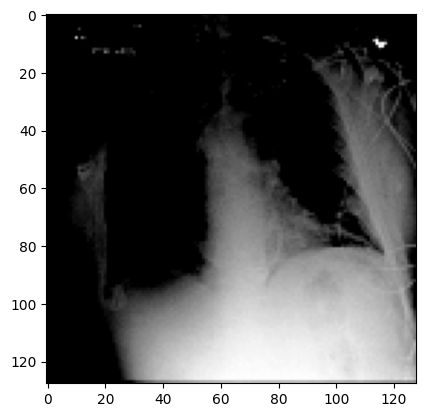

In [ ]:
## One of the pre processed image from custom train generotr
imageSet0 = trainUNetDataGen[1][0][1]
plt.imshow(imageSet0)

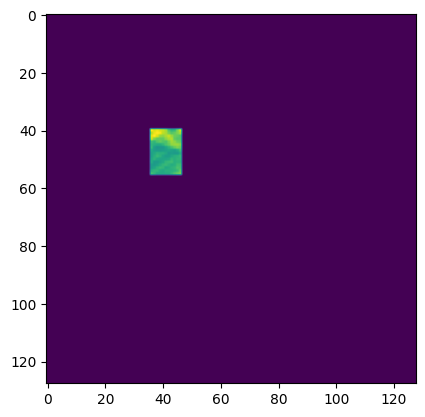

In [ ]:
## Masks for the same
imageSet0 = trainUNetDataGen[2][0]
maskSet0 = trainUNetDataGen[2][1]
showMaskedImage(imageSet0, maskSet0, 4)

In [ ]:
ALPHA = 1.0
def create_UNetModelUsingMobileNet(trainable=True):
    """Function to create UNet architecture with MobileNet.

    Arguments:
        trainable -- Flag to make layers trainable. Default value is 'True'.
    """
    # Get all layers with 'imagenet' weights
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA, weights="imagenet")
    # Top layer is last layer of the model

    # Make all layers trainable
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    convLayer_112by112 = model.get_layer("conv_pw_1_relu").output
    convLayer_56by56 = model.get_layer("conv_pw_3_relu").output
    convLayer_28by28 = model.get_layer("conv_pw_5_relu").output
    convLayer_14by14 = model.get_layer("conv_pw_11_relu").output
    convLayer_7by7 = model.get_layer("conv_pw_13_relu").output
    # The last layer of mobilenet model is of dimensions (7x7x1024)

    # Start upsampling from 7x7 to 14x14 ...up to 224x224 to form UNET
    # concatinate with the original image layer of the same size from MobileNet
    x = Concatenate()([UpSampling2D()(convLayer_7by7), convLayer_14by14])
    x = Concatenate()([UpSampling2D()(x), convLayer_28by28])
    x = Concatenate()([UpSampling2D()(x), convLayer_56by56])
    x = Concatenate()([UpSampling2D()(x), convLayer_112by112])
    x = UpSampling2D(name="unet_last")(x) # upsample to 224x224

    # Add classification layer
    x = Conv2D(1, kernel_size=1, activation="sigmoid", name="masks")(x)
    x = Reshape((IMAGE_SIZE, IMAGE_SIZE))(x)

    return Model(inputs=model.input, outputs=x)

In [ ]:
## Build a model
input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)
model = create_UNetModelUsingMobileNet(input_shape)
model.summary()

17225924/17225924 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_1[0][0]']             
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 32)           128       ['conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 conv1_relu (ReLU)           

In [ ]:
#dice_coef 2 * the Area of Overlap divided by the total number of pixels in both images
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + tf.keras.backend.epsilon()) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + tf.keras.backend.epsilon())

## Loss is 1 - the coefficent of two images
def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [ ]:
## Call Backs for ealy stopping and reduce learning rate
## Reduce the learning rate when teh validation loss is same for 4 epocs
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False)
]

In [ ]:
LR = 1e-4
## Optimiser , metrics and loss for the model
opt = tf.keras.optimizers.Nadam(LR)
metrics = [dice_coef, Recall(), Precision()]
model.compile(loss=dice_loss, optimizer=opt, metrics=metrics)


In [ ]:
## Running the model
train_steps = len(trainUNetDataGen)//BATCH_SIZE
valid_steps = len(validateUNetDataGen)//BATCH_SIZE

if len(trainUNetDataGen) % BATCH_SIZE != 0:
    train_steps += 1
if len(validateUNetDataGen) % BATCH_SIZE != 0:
    valid_steps += 1

history = model.fit(trainUNetDataGen, epochs=16,steps_per_epoch=train_steps,
                        validation_data=validateUNetDataGen,
                        callbacks=callbacks,
                        use_multiprocessing=True,workers=4,
                        validation_steps=valid_steps,shuffle=True)


Epoch 1/16
200/200 [==============================] - 49s 110ms/step - loss: 0.8109 - dice_coef: 0.1891 - recall: 0.4795 - precision: 0.1385 - val_loss: 0.8811 - val_dice_coef: 0.1189 - val_recall: 0.6197 - val_precision: 0.1377 - lr: 1.0000e-04
Epoch 2/16
200/200 [==============================] - 21s 105ms/step - loss: 0.7456 - dice_coef: 0.2544 - recall: 0.4722 - precision: 0.2278 - val_loss: 0.8804 - val_dice_coef: 0.1196 - val_recall: 0.4181 - val_precision: 0.1652 - lr: 1.0000e-04
Epoch 3/16
200/200 [==============================] - 21s 104ms/step - loss: 0.7255 - dice_coef: 0.2745 - recall: 0.4671 - precision: 0.2653 - val_loss: 0.8539 - val_dice_coef: 0.1461 - val_recall: 0.5640 - val_precision: 0.1751 - lr: 1.0000e-04
Epoch 4/16
200/200 [==============================] - 21s 105ms/step - loss: 0.6905 - dice_coef: 0.3095 - recall: 0.4835 - precision: 0.2952 - val_loss: 0.8594 - val_dice_coef: 0.1406 - val_recall: 0.4225 - val_precision: 0.2208 - lr: 1.0000e-04
Epoch 5/16
200/2

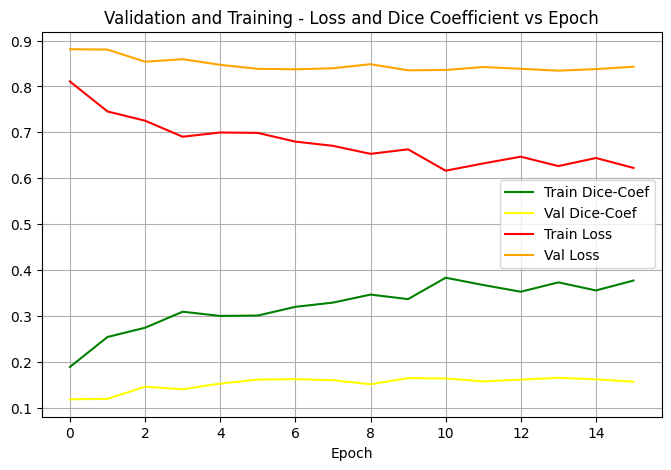

In [ ]:
## PLot Matrix between training and validation data
plt.figure(figsize=(8, 5))
plt.grid(True)
plt.plot(history.history['dice_coef'],     label='Train Dice-Coef',      color = "green" );
plt.plot(history.history['val_dice_coef'], label='Val Dice-Coef',  color = "yellow");
plt.plot(history.history['loss'],         label='Train Loss',          color = "red"   );
plt.plot(history.history['val_loss'],     label='Val Loss',      color = "orange");
plt.title("Validation and Training - Loss and Dice Coefficient vs Epoch")
plt.xlabel("Epoch")
plt.legend();

val_dice-oefficient value is very low and pretty much a flat curve, indicating underfitting indicating model has not learnt sufficiently. It is steadily increasing, not sufficient training(more epochs needed).  

We have used an image size of 128x128 as against the original size of 1024x1024. Using a higher resolution, could also improve training capacity

<li>Hyper-parameter tuning, image_augmentation, using different architectures will help in increasing model performance and generalization.


In [ ]:
##Preparing test data , picked up random 20 images
test_CombinedData = train_labels[15000:15020]
test_CombinedData.fillna(0, inplace=True)

In [ ]:
##Check target distrubution in test dataset, there are both the classes available with equal sdistrubution
test_CombinedData.Target.value_counts()

0    10
1    10
Name: Target, dtype: int64

In [ ]:
## Setting the custom generator for test data
testUNetDataGen = TrainGenerator(test_CombinedData)

In [ ]:
## evaluating the model
test_steps = (len(testUNetDataGen)//BATCH_SIZE)
if len(testUNetDataGen) % BATCH_SIZE != 0:
    test_steps += 1

model.evaluate(testUNetDataGen)

4/4 [==============================] - 0s 73ms/step - loss: 0.5607 - dice_coef: 0.4393 - recall: 0.4646 - precision: 0.4486


[0.5607250928878784,
 0.43927493691444397,
 0.4646085202693939,
 0.4486173689365387]

In [ ]:
## Precidt the test data that we have
pred_mask = model.predict(testUNetDataGen)

4/4 [==============================] - 1s 64ms/step


In [ ]:
test_CombinedData = test_CombinedData.reset_index()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = []
y_True = []
imageList = []
predMaskTemp = []
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
def getPredictions(test_CombinedData):
    masks = np.zeros((int(test_CombinedData.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))

    for index, row in test_CombinedData.iterrows():
        patientId = row.patientId
        print(patientId)

        classlabel = row["Target"]
        dcm_file = '/content/drive/MyDrive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images/'+'{}.dcm'.format(patientId)
        dcm_data = dcm.read_file(dcm_file)
        img = dcm_data.pixel_array
        resized_img = cv2.resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH), interpolation = cv2.INTER_LINEAR)
        predMaskTemp.append(pred_mask[index])
        iou = (pred_mask[index] > 0.5) * 1.0
        y_pred.append((1 in iou) * 1)
        imageList.append(resized_img)
        y_True.append(classlabel)
        x_scale = IMAGE_HEIGHT / 1024
        y_scale = IMAGE_WIDTH / 1024

        if(classlabel == 1):
            x = int(np.round(row['x'] * x_scale))
            y = int(np.round(row['y'] * y_scale))
            w = int(np.round(row['width'] * x_scale))
            h = int(np.round(row['height'] * y_scale))
            masks[index][y:y+h, x:x+w] = 1



    tmpImages = np.array(imageList)
    tmpMask = np.array(predMaskTemp)
    originalMask = np.array(masks)
    return (y_True,y_pred,tmpImages,tmpMask ,originalMask)

def print_confusion_matrix(y_true, y_pred):
    '''Function to print confusion_matrix'''

    # Get confusion matrix array
    array = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(array, range(2), range(2))

    print("Total samples = ", len(test_CombinedData))

    # Plot heatmap and get sns heatmap values
    sns.set(font_scale=1.4); # for label size
    result = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', cbar=False);

    # Add labels to heatmap
    labels = ['TN=','FP=','FN=','TP=']
    i=0
    for t in result.texts:
        t.set_text(labels[i] + t.get_text())
        i += 1

    plt.xlabel("Predicted Values")
    plt.ylabel('True Values')
    plt.show()
    return

In [ ]:
## Create predictions map
y_true,y_pred ,imagelist , maskList , originalMask = getPredictions(test_CombinedData)

934d2f15-76ae-4a2c-817f-a3b022b0cc10
934de9ea-b41c-45cf-a6f0-93f93cc7940e
934e5ecd-c6e7-4c9d-8855-836227bde5f8
9353a231-323a-469f-a7ad-706f900b1202
9353a231-323a-469f-a7ad-706f900b1202
93550df9-7f67-404f-a974-516acecd5c48
9358d1c5-ba61-4150-a233-41138208a3f9
935a25a1-3573-47b7-b91f-b3852b9a8f11
935f4fd2-337a-4a58-9004-2c56af697428
9363ce31-c17d-4287-ba3e-39ea2884a3cf
9363ce31-c17d-4287-ba3e-39ea2884a3cf
9366e300-5b42-42e4-98b1-48a8c821f679
936cae03-d766-4566-a42b-0e6b3360d2a4
936e16c0-f39a-4970-903f-6af6722c26b4
936f2425-bc13-49ce-a4a1-979fd314ab48
936f2425-bc13-49ce-a4a1-979fd314ab48
936f68b6-a40e-4bd7-bc4e-60ad12a4b31b
93708fca-e95a-40b8-9c7f-e99c8ccf10fd
93711eaf-7c5a-49e7-a5f3-b06922e0fa9b
93727b85-2fa2-478d-aecc-46e14f391dd5


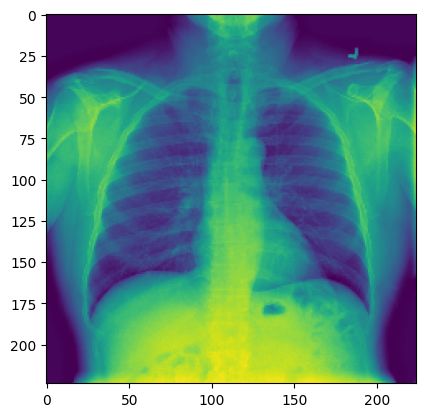

In [ ]:

dcm_file = '/content/drive/MyDrive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images/'+'{}.dcm'.format('9358d1c5-ba61-4150-a233-41138208a3f9')
dcm_data = dcm.read_file(dcm_file)
img = dcm_data.pixel_array
plt.imshow(imagelist[12])

Text(0.5, 0, 'Pneumonia 1:')

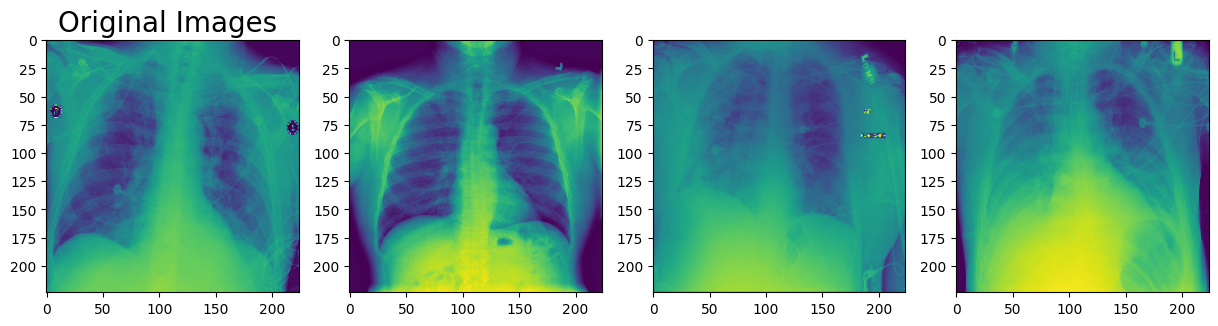

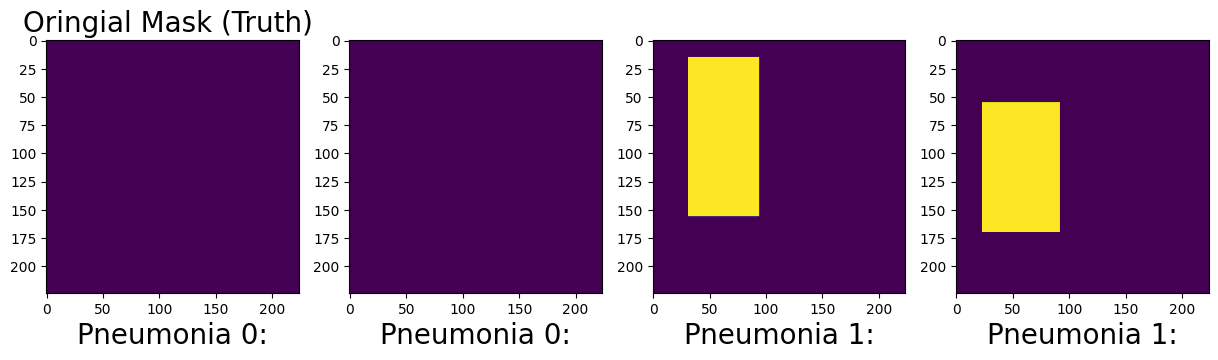

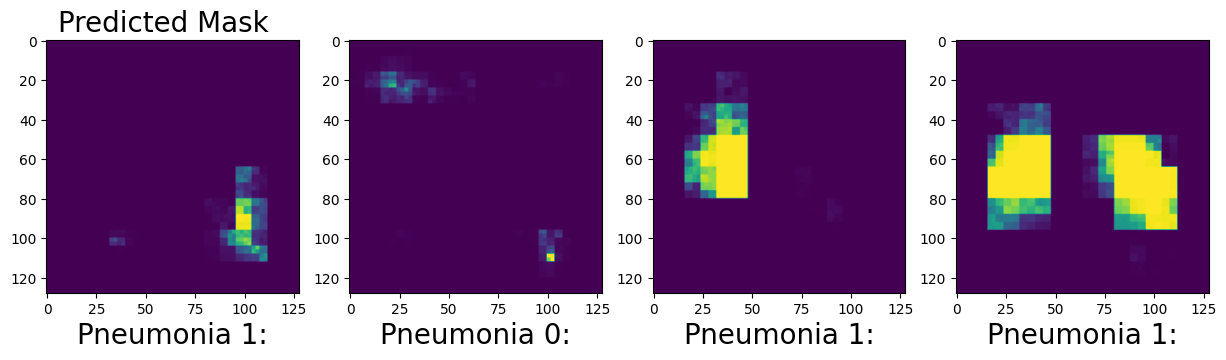

In [ ]:
## Visualising the train and output data
fig = plt.figure(figsize=(15, 15))

a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(imagelist[1])
a.set_title('Original Images ',fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(imagelist[12])

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(imagelist[13])

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(imagelist[15])

fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)

imgplot = plt.imshow(originalMask[1])
a.set_title('Oringial Mask (Truth) ',fontsize=20)

a.set_xlabel('Pneumonia {}:'.format(y_true[1]), fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(originalMask[12])
a.set_xlabel('Pneumonia {}:'.format(y_true[12]), fontsize=20)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(originalMask[13])
a.set_xlabel('Pneumonia {}:'.format(y_true[13]), fontsize=20)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(originalMask[15])
a.set_xlabel('Pneumonia {}:'.format(y_true[15]), fontsize=20)


fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
a.set_title('Predicted Mask  ',fontsize=20)
imgplot = plt.imshow(maskList[1])
a.set_xlabel('Pneumonia {}:'.format(y_pred[1]), fontsize=20)

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(maskList[12])
a.set_xlabel('Pneumonia {}:'.format(y_pred[12]), fontsize=20)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(maskList[13])
a.set_xlabel('Pneumonia {}:'.format(y_pred[13]), fontsize=20)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(maskList[15])
a.set_xlabel('Pneumonia {}:'.format(y_pred[15]), fontsize=20)


# we could see that the first mis-classifed
# Second predcited correctly
# Thrid is predcited correctly and the bouding box is also almost at the same position
# fourth is predicted correctly but there are two boudnign boxes, this culd be because there are duplicate patient id and we are picking only one mask to display inte Truth

Total samples =  20


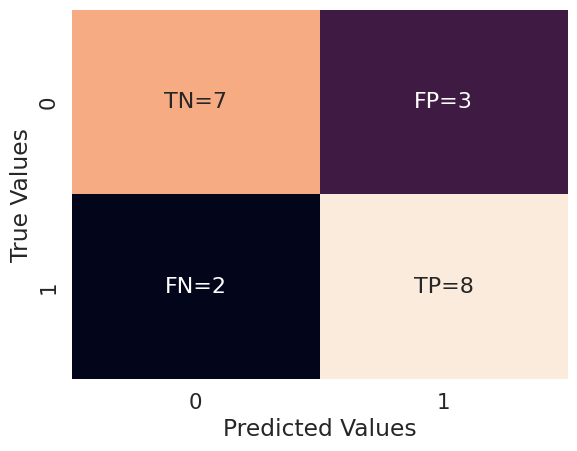

In [ ]:
print_confusion_matrix(y_true,y_pred )
## There are two False Postive for Target 1

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.73      0.80      0.76        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



**YOLO V3 Implementation **

In [ ]:
pip install pydicom

In [ ]:
import os
import csv
import random
import pydicom
import numpy as np
import pandas as pd
from skimage import measure
from skimage.transform import resize
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [ ]:
pneumonia_locations = {}
# load table
with open(os.path.join('/content/drive/My Drive/AIML/Capstone Project/stage_2_train_labels.csv'),
          'r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

In [ ]:
# load and shuffle filenames
folder = '/content/drive/My Drive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images'
filenames = os.listdir(folder)
random.shuffle(filenames)
# split into train and validation filenames
n_valid_samples = 8000
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

n train samples 18684
n valid samples 8000


In [ ]:
class generator(keras.utils.Sequence):
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()

    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk

    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img

    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks

    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)

    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [ ]:
# define iou or jaccard loss function
def iou_loss(y_true, y_pred):
    #print(y_true)
    y_true=tf.cast(y_true, tf.float32)
    y_pred=tf.cast(y_pred, tf.float32)
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])

    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x

def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

def create_network(input_size, channels, n_blocks=2, depth=4):
    # input
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
BATCH_SIZE = 128
IMAGE_SIZE = 128

In [ ]:
model = create_network(input_size=IMAGE_SIZE, channels=32, n_blocks=2, depth=4)
model.compile(optimizer='adam', loss=iou_bce_loss, metrics=['accuracy', mean_iou])

# cosine learning rate annealing
def cosine_annealing(x):
    lr = 0.0001
    epochs = 3
    return lr*(np.cos(np.pi*x/epochs)+1.)/2


learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)

# create train and validation generators
folder = '/content/drive/My Drive/AIML/Capstone Project/stage_2_train_images/stage_2_train_images'
train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=BATCH_SIZE,
                      image_size=IMAGE_SIZE, shuffle=True, augment=False, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=BATCH_SIZE,
                      image_size=IMAGE_SIZE, shuffle=False, predict=False)

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         288       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 32)         0         ['batch_normalization[0]

In [ ]:
EPOCHS=5
MULTI_PROCESSING = True

history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=EPOCHS,
                              workers=4, use_multiprocessing=MULTI_PROCESSING)

Epoch 1/5
145/145 [==============================] - 795s 5s/step - loss: 0.5038 - accuracy: 0.9519 - mean_iou: 0.6507 - val_loss: 0.4468 - val_accuracy: 0.9679 - val_mean_iou: 0.7323 - lr: 1.0000e-04
Epoch 2/5
145/145 [==============================] - 780s 5s/step - loss: 0.4358 - accuracy: 0.9677 - mean_iou: 0.7286 - val_loss: 0.4443 - val_accuracy: 0.9726 - val_mean_iou: 0.7514 - lr: 7.5000e-05
Epoch 3/5
145/145 [==============================] - 781s 5s/step - loss: 0.4186 - accuracy: 0.9704 - mean_iou: 0.7436 - val_loss: 0.4253 - val_accuracy: 0.9694 - val_mean_iou: 0.7340 - lr: 2.5000e-05
Epoch 4/5
145/145 [==============================] - 804s 5s/step - loss: 0.4064 - accuracy: 0.9712 - mean_iou: 0.7507 - val_loss: 0.4260 - val_accuracy: 0.9690 - val_mean_iou: 0.7321 - lr: 0.0000e+00
Epoch 5/5
145/145 [==============================] - 793s 5s/step - loss: 0.4079 - accuracy: 0.9714 - mean_iou: 0.7505 - val_loss: 0.4256 - val_accuracy: 0.9680 - val_mean_iou: 0.7334 - lr: 2.5000

In [ ]:
model_save_path = '/content/drive/My Drive/AIML/Capstone Project/Pneumonia_model.h5'
# Save the trained model
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")

Model saved at: /content/drive/My Drive/AIML/Capstone Project/Pneumonia_model.h5


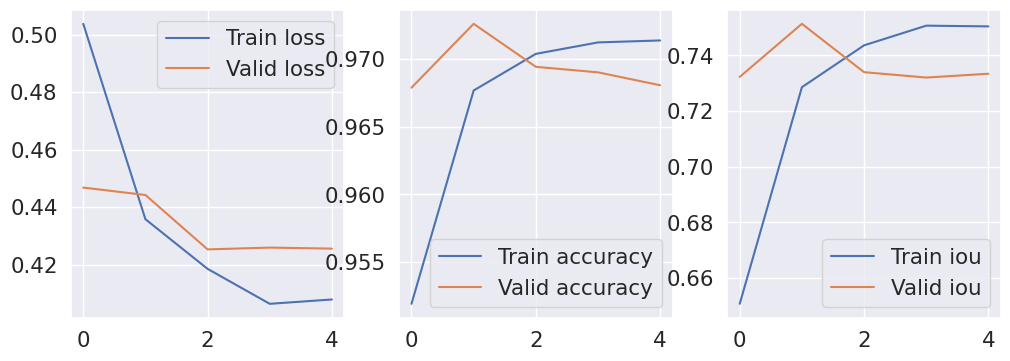

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(history.epoch, history.history["mean_iou"], label="Train iou")
plt.plot(history.epoch, history.history["val_mean_iou"], label="Valid iou")
plt.legend()
plt.show()

4/4 [==============================] - 1s 22ms/step


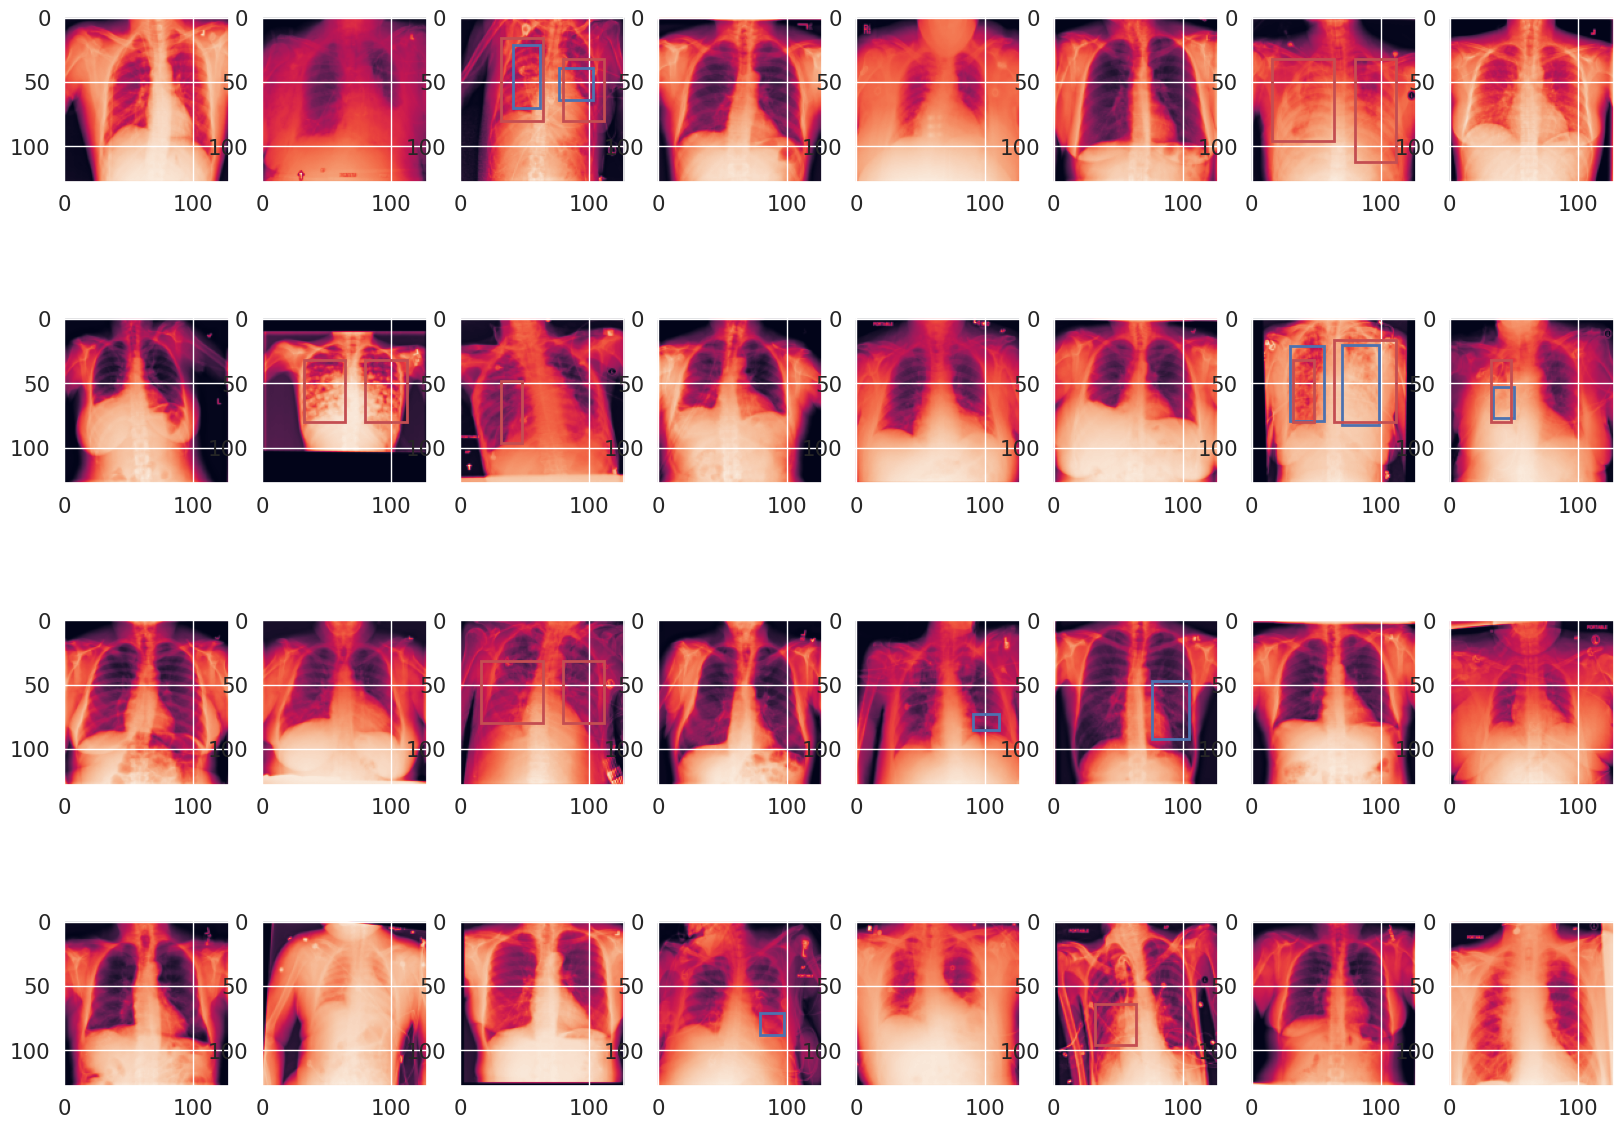

In [ ]:
i=0
for imgs, msks in valid_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # create figure
    f, axarr = plt.subplots(4, 8, figsize=(20,15))
    axarr = axarr.ravel()
    axidx = 0
    # loop through batch
    for img, msk, pred in zip(imgs, msks, preds):
        i=i+1
        #exit after 32 images
        if i>32:
            break
        # plot image
        axarr[axidx].imshow(img[:, :, 0])
        # threshold true mask
        comp = msk[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,
                                                     edgecolor='b',facecolor='none'))
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,
                                                     edgecolor='r',facecolor='none'))
        axidx += 1
    plt.show()
    # only plot one batch
    break

In [ ]:
def post_process_predictions(pred):
    # Assuming pred is a binary mask, convert it to coordinates of the bounding box
    pred = pred.squeeze()  # Assuming your model outputs (batch_size, height, width, 1)
    coords = np.argwhere(pred > 0.5)  # Threshold the mask
    if len(coords) == 0:
        return "0 0 0 0"  # No pneumonia predicted
    ymin, xmin = np.min(coords, axis=0)
    ymax, xmax = np.max(coords, axis=0)
    return f"{xmin} {ymin} {xmax-xmin} {ymax-ymin}"


In [ ]:
import os
import pandas as pd
import pydicom
import numpy as np
from skimage.transform import resize
from keras.models import load_model

class TestGenerator:
    def __init__(self, folder, filenames, batch_size=32, image_size=256):
        self.folder = folder
        self.filenames = filenames
        self.batch_size = batch_size
        self.image_size = image_size
        self.index = 0
        self.max_index = len(filenames)

    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img

    def __getitem__(self):
        # select batch
        start = self.index
        end = min(self.index + self.batch_size, self.max_index)
        # load files
        filenames_batch = self.filenames[start:end]
        imgs = [self.__load__(filename) for filename in filenames_batch]
        # create numpy batch
        imgs = np.array(imgs)
        self.index += self.batch_size
        return imgs, filenames_batch

# Path to the test images folder
test_folder = '/content/drive/My Drive/AIML/Capstone Project/stage_2_test_images/stage_2_test_images'
test_filenames = os.listdir(test_folder)

# Initialize the test generator
test_gen = TestGenerator(test_folder, test_filenames, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)

# Load the trained model
#model = load_model('/path/to/your/trained/model.h5')

# Make predictions on test images
predictions, filenames = [], []
while test_gen.index < test_gen.max_index:
    imgs, filenames_batch = test_gen.__getitem__()
    preds_batch = model.predict(imgs)
    predictions.extend(preds_batch)
    filenames.extend(filenames_batch)

# Assuming you have a post-processing function post_process_predictions
# to convert model predictions into region information
regions_info = [post_process_predictions(pred) for pred in predictions]

# Create a DataFrame to store the results
results_df = pd.DataFrame({'image_id': filenames, 'PredictionString': regions_info})

# Save the results to a CSV file
results_df.to_csv('/content/drive/My Drive/AIML/Capstone Project/results.csv', index=False)


2/2 [==============================] - 1s 921ms/step


In [ ]:
print(results_df.head(10) )

                                   image_id PredictionString
0  2392af63-9496-4e72-b348-9276432fd797.dcm          0 0 0 0
1  2ce40417-1531-4101-be24-e85416c812cc.dcm          0 0 0 0
2  2bc0fd91-931a-446f-becb-7a6d3f2a7678.dcm          0 0 0 0
3  29d42f45-5046-4112-87fa-18ea6ea97e75.dcm          0 0 0 0
4  208e3daf-18cb-4bf7-8325-0acf318ed62c.dcm          0 0 0 0
5  20f708ac-0e1a-40fb-908c-5091f4a4c08d.dcm      32 16 79 63
6  1f75252b-2fff-4b7d-82cb-31189112f05b.dcm          0 0 0 0
7  1a926cbe-1654-43dd-949f-47bd7ca95bb1.dcm          0 0 0 0
8  0066ba32-08b6-4ac9-8d5a-abec69825d53.dcm      80 48 15 15
9  24e16db4-65a9-4e5e-81d1-701c8fae06ba.dcm          0 0 0 0


**Mask-RCNN Starter Model for the RSNA Pneumonia Detection Challenge with transfer learning **

Using pre-trained COCO weights trained on http://cocodataset.org as in https://github.com/matterport/Mask_RCNN/tree/master/samples/balloon

### Install Matterport's Mask-RCNN model from github.
See the [Matterport's implementation of Mask-RCNN](https://github.com/matterport/Mask_RCNN).

In [27]:
#!git clone https://www.github.com/matterport/Mask_RCNN.git
!git clone https://github.com/akTwelve/Mask_RCNN.git
os.chdir('Mask_RCNN')

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 979, done.
remote: Total 979 (delta 0), reused 0 (delta 0), pack-reused 979
Receiving objects: 100% (979/979), 137.72 MiB | 39.85 MiB/s, done.
Resolving deltas: 100% (570/570), done.


In [28]:
import os
import sys
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import pydicom
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd
import glob
from sklearn.model_selection import KFold


DATA_DIR = '/content'
print(DATA_DIR)
# Directory to save logs and trained model
ROOT_DIR = '/content/model'
print(ROOT_DIR)

# Import Mask RCNN
sys.path.append(os.path.join(ROOT_DIR, 'Mask_RCNN'))  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

/content
/content/model


In [29]:
train_dicom_dir = os.path.join(DATA_DIR, 'stage_2_train_images')
test_dicom_dir = os.path.join(DATA_DIR, 'stage_2_test_images')

In [30]:
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!ls -lh mask_rcnn_coco.h5

COCO_WEIGHTS_PATH = "mask_rcnn_coco.h5"

-rw-r--r-- 1 root root 246M Dec  6  2021 mask_rcnn_coco.h5


### Setup functions and classes for Mask-RCNN

- dicom_fps is a list of the dicom image path and filenames
- image_annotions is a dictionary of the annotations keyed by the filenames
- parsing the dataset returns a list of the image filenames and the annotations dictionary

In [31]:
def get_dicom_fps(dicom_dir):
    dicom_fps = glob.glob(dicom_dir+'/'+'*.dcm')
    return list(set(dicom_fps))

def parse_dataset(dicom_dir, anns):
    image_fps = get_dicom_fps(dicom_dir)
    image_annotations = {fp: [] for fp in image_fps}
    for index, row in anns.iterrows():
        fp = os.path.join(dicom_dir, row['patientId']+'.dcm')
        image_annotations[fp].append(row)
    return image_fps, image_annotations

In [32]:
# The following parameters have been selected to reduce running time for demonstration purposes
# These are not optimal

class DetectorConfig(Config):
    """Configuration for training pneumonia detection on the RSNA pneumonia dataset.
    Overrides values in the base Config class.
    """

    # Give the configuration a recognizable name
    NAME = 'pneumonia'

    # Train on 1 GPU and 8 images per GPU. We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU).
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8

    BACKBONE = 'resnet50'

    NUM_CLASSES = 2  # background + 1 pneumonia classes

    IMAGE_MIN_DIM = 256
    IMAGE_MAX_DIM = 256
    RPN_ANCHOR_SCALES = (16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 4
    DETECTION_MAX_INSTANCES = 3
    DETECTION_MIN_CONFIDENCE = 0.78  ## match target distribution
    DETECTION_NMS_THRESHOLD = 0.01

    STEPS_PER_EPOCH = 200

config = DetectorConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        3
DETECTION_MIN_CONFIDENCE       0.78
DETECTION_NMS_THRESHOLD        0.01
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [33]:
class DetectorDataset(utils.Dataset):
    """Dataset class for training pneumonia detection on the RSNA pneumonia dataset.
    """

    def __init__(self, image_fps, image_annotations, orig_height, orig_width):
        super().__init__(self)

        # Add classes
        self.add_class('pneumonia', 1, 'Lung Opacity')

        # add images
        for i, fp in enumerate(image_fps):
            annotations = image_annotations[fp]
            self.add_image('pneumonia', image_id=i, path=fp,
                           annotations=annotations, orig_height=orig_height, orig_width=orig_width)

    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def load_image(self, image_id):
        info = self.image_info[image_id]
        fp = info['path']
        ds = pydicom.read_file(fp)
        image = ds.pixel_array.astype(np.float32)  # Convert to float32
        # If grayscale. Convert to RGB for consistency.
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)
        return image


    def load_mask(self, image_id):
        info = self.image_info[image_id]
        annotations = info['annotations']
        count = len(annotations)
        if count == 0:
            mask = np.zeros((info['orig_height'], info['orig_width'], 1), dtype=np.uint8)
            class_ids = np.zeros((1,), dtype=np.int32)
        else:
            mask = np.zeros((info['orig_height'], info['orig_width'], count), dtype=np.uint8)
            class_ids = np.zeros((count,), dtype=np.int32)
            for i, a in enumerate(annotations):
                if a['Target'] == 1:
                    x = int(a['x'])
                    y = int(a['y'])
                    w = int(a['width'])
                    h = int(a['height'])
                    mask_instance = mask[:, :, i].copy()
                    cv2.rectangle(mask_instance, (x, y), (x+w, y+h), 255, -1)
                    mask[:, :, i] = mask_instance
                    class_ids[i] = 1
        return mask.astype(np.bool), class_ids.astype(np.int32)

### Examine the annotation data, parse the dataset, and view dicom fields

In [34]:
# training dataset
anns = pd.read_csv('/content/drive/My Drive/AIML/Capstone Project/stage_2_train_labels.csv')
anns.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [35]:
image_fps, image_annotations = parse_dataset(train_dicom_dir, anns=anns)

In [36]:
# read dicom image from filepath
ds = pydicom.read_file(image_fps[0])
image = ds.pixel_array

In [37]:
image

array([[  3,   8,   8, ...,   3,   2,   1],
       [ 11,  15,  16, ...,   4,   3,   2],
       [  8,  12,  13, ...,   5,   4,   3],
       ...,
       [108, 190, 187, ..., 168, 168,  95],
       [117, 190, 190, ..., 169, 173, 110],
       [ 52, 102,  89, ...,  78,  92,  44]], dtype=uint8)

In [38]:
# Original DICOM image size: 1024 x 1024
ORIG_SIZE = 1024

In [39]:
image_fps_list = list(image_fps)
random.seed(42)
random.shuffle(image_fps_list)
val_size = 1500
image_fps_val = image_fps_list[:val_size]
image_fps_train = image_fps_list[val_size:]

print(len(image_fps_train), len(image_fps_val))

25184 1500


In [40]:
# prepare the training dataset
dataset_train = DetectorDataset(image_fps_train, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_train.prepare()

In [41]:
# Show annotation(s) for a DICOM image
test_fp = random.choice(image_fps_train)
image_annotations[test_fp]

[patientId    c9c114a1-5ddf-4460-855c-25dac3ae7289
 x                                             NaN
 y                                             NaN
 width                                         NaN
 height                                        NaN
 Target                                          0
 Name: 22299, dtype: object]

In [42]:
# prepare the validation dataset
dataset_val = DetectorDataset(image_fps_val, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_val.prepare()

(1024, 1024, 3)
/content/stage_2_train_images/ef0fe9c2-fb59-4631-86ec-c47020ff231b.dcm
[1 1]


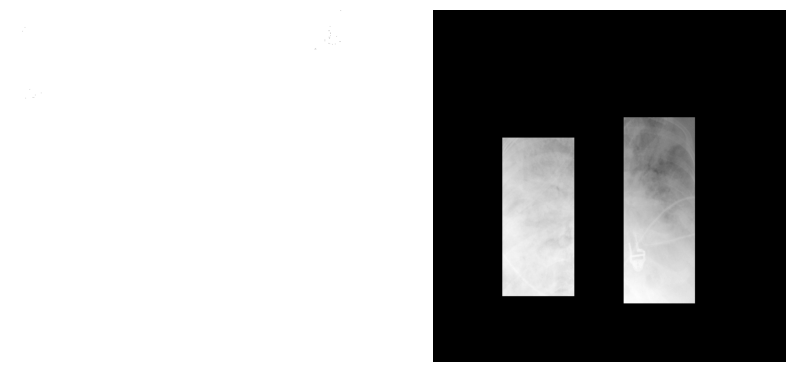

In [45]:
# Load and display random sample and their bounding boxes

class_ids = [0]
while class_ids[0] == 0:  ## look for a mask
    image_id = random.choice(dataset_train.image_ids)
    image_fp = dataset_train.image_reference(image_id)
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)

print(image.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += image[:, :, 0] * mask[:, :, i]
plt.imshow(masked, cmap='gray')
plt.axis('off')

print(image_fp)
print(class_ids)

In [26]:
model = modellib.MaskRCNN(mode='training', config=config, model_dir=ROOT_DIR)

# Exclude the last layers because they require a matching
# number of classes
model.load_weights(COCO_WEIGHTS_PATH, by_name=True, exclude=[
    "mrcnn_class_logits", "mrcnn_bbox_fc",
    "mrcnn_bbox", "mrcnn_mask"])

In [27]:
LEARNING_RATE = 0.006

# Train Mask-RCNN Model
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#%%time
## train heads with higher lr to speedup the learning
model.train(dataset_train, dataset_val,
            learning_rate=None,
            epochs=1,
            layers='heads',
            augmentation=None)  ## no need to augment yet

history = model.keras_model.history.history


Starting at epoch 0. LR=None

Checkpoint Path: /content/model/pneumonia20231223T1933/mask_rcnn_pneumonia_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_deconv      (Time

In [ ]:
#%%time
model.train(dataset_train, dataset_val,learning_rate=LEARNING_RATE,epochs=6,layers='all', augmentation=augmentation)

new_history = model.keras_model.history.history

In [ ]:
class InferenceConfig(DetectorConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()
model_path = '/content/model/pneumonia20231223T1933/mask_rcnn_pneumonia_{epoch:04d}.h5'

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode='inference',
                          config=inference_config,
                          model_dir=ROOT_DIR)

# Load trained weights (fill in path to trained weights here)

print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

In [ ]:
# set color for class
def get_colors_for_class_ids(class_ids):
    colors = []
    for class_id in class_ids:
        if class_id == 1:
            colors.append((.941, .204, .204))
    return colors

In [ ]:
# Show few example of ground truth vs. predictions on the validation dataset
dataset = dataset_val
fig = plt.figure(figsize=(10, 30))

for i in range(6):

    image_id = random.choice(dataset.image_ids)

    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)

    print(original_image.shape)
    plt.subplot(6, 2, 2*i + 1)
    visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id,
                                dataset.class_names,
                                colors=get_colors_for_class_ids(gt_class_id), ax=fig.axes[-1])

    plt.subplot(6, 2, 2*i + 2)
    results = model.detect([original_image]) #, verbose=1)
    r = results[0]
    visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                                dataset.class_names, r['scores'],
                                colors=get_colors_for_class_ids(r['class_ids']), ax=fig.axes[-1])

In [ ]:
# Get filenames of test dataset DICOM images
test_image_fps = get_dicom_fps(test_dicom_dir)

In [ ]:
# Make predictions on test images, write out sample submission
def predict(image_fps, filepath, min_conf=0.95):
    # assume square image
    resize_factor = ORIG_SIZE / config.IMAGE_SHAPE[0]
    #resize_factor = ORIG_SIZE
    with open(filepath, 'w') as file:
        file.write("patientId,PredictionString\n")

        for image_id in tqdm(image_fps):
            ds = pydicom.read_file(image_id)
            image = ds.pixel_array
            # If grayscale. Convert to RGB for consistency.
            if len(image.shape) != 3 or image.shape[2] != 3:
                image = np.stack((image,) * 3, -1)
            image, window, scale, padding, crop = utils.resize_image(
                image,
                min_dim=config.IMAGE_MIN_DIM,
                min_scale=config.IMAGE_MIN_SCALE,
                max_dim=config.IMAGE_MAX_DIM,
                mode=config.IMAGE_RESIZE_MODE)

            patient_id = os.path.splitext(os.path.basename(image_id))[0]

            results = model.detect([image])
            r = results[0]

            out_str = ""
            out_str += patient_id
            out_str += ","
            assert( len(r['rois']) == len(r['class_ids']) == len(r['scores']) )
            if len(r['rois']) == 0:
                pass
            else:
                num_instances = len(r['rois'])

                for i in range(num_instances):
                    if r['scores'][i] > min_conf:
                        out_str += ' '
                        out_str += str(round(r['scores'][i], 2))
                        out_str += ' '

                        # x1, y1, width, height
                        x1 = r['rois'][i][1]
                        y1 = r['rois'][i][0]
                        width = r['rois'][i][3] - x1
                        height = r['rois'][i][2] - y1
                        bboxes_str = "{} {} {} {}".format(x1*resize_factor, y1*resize_factor, \
                                                           width*resize_factor, height*resize_factor)
                        out_str += bboxes_str

            file.write(out_str+"\n")

In [ ]:
submission_fp = os.path.join('/content/drive/My Drive/AIML/Capstone Project/', 'submission_ritesh.csv')
predict(test_image_fps, filepath=submission_fp)
print(submission_fp)